In [1]:
import requests

In [2]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

response = requests.get('https://www.themoviedb.org/movie', headers = header)

In [3]:
response

<Response [200]>

In [4]:
movies=response.text
from bs4 import BeautifulSoup
soup= BeautifulSoup(movies,'lxml')

In [5]:
movie_name = soup.find('div',class_='card style_1').h2.text
movie_rating = soup.find('div',class_='user_score_chart')['data-percent']
movie_date = soup.find('div',class_='card style_1').p.text
print(movie_name)
print(movie_rating)
print(movie_date)

Sonic the Hedgehog 2
77.0
Mar 30, 2022


In [6]:
movies_list = []
all_movies_name = soup.find_all('div',class_='card style_1')
for item in all_movies_name:
    movie_name = item.find('div',class_='content')
    movie_name = movie_name.find("h2").text
    movie_rating = item.find('div',class_='user_score_chart')['data-percent']
    movie_date = item.find('div',class_='content')
    movie_date = movie_date.find("p").text
    url="www.themoviedb.org"
    movie_link = item.find('h2').a['href']
    movies_links = url+movie_link
    my_movies_dict = {
        "Movie Name":movie_name,
        "Movie Rating":movie_rating,
        "Movie Date":movie_date,
        "Movie Link":movies_links
    }
    movies_list.append(my_movies_dict)
    
print(movies_list)

[{'Movie Name': 'Sonic the Hedgehog 2', 'Movie Rating': '77.0', 'Movie Date': 'Mar 30, 2022', 'Movie Link': 'www.themoviedb.org/movie/675353'}, {'Movie Name': 'The Batman', 'Movie Rating': '78.0', 'Movie Date': 'Mar 01, 2022', 'Movie Link': 'www.themoviedb.org/movie/414906'}, {'Movie Name': 'The Bad Guys', 'Movie Rating': '78.0', 'Movie Date': 'Mar 17, 2022', 'Movie Link': 'www.themoviedb.org/movie/629542'}, {'Movie Name': 'Uncharted', 'Movie Rating': '72.0', 'Movie Date': 'Feb 10, 2022', 'Movie Link': 'www.themoviedb.org/movie/335787'}, {'Movie Name': 'Doctor Strange in the Multiverse of Madness', 'Movie Rating': '75.0', 'Movie Date': 'May 04, 2022', 'Movie Link': 'www.themoviedb.org/movie/453395'}, {'Movie Name': 'Spider-Man: No Way Home', 'Movie Rating': '81.0', 'Movie Date': 'Dec 15, 2021', 'Movie Link': 'www.themoviedb.org/movie/634649'}, {'Movie Name': 'The eighth clause', 'Movie Rating': '49.0', 'Movie Date': 'Apr 29, 2022', 'Movie Link': 'www.themoviedb.org/movie/956101'}, {'Mo

In [7]:
page_url = "https://www.themoviedb.org/movie?page="

In [8]:
pages_url = []
for i in range(1,201):
    pages_link=page_url+str(i)
    pages_url.append(pages_link)
pages_url

['https://www.themoviedb.org/movie?page=1',
 'https://www.themoviedb.org/movie?page=2',
 'https://www.themoviedb.org/movie?page=3',
 'https://www.themoviedb.org/movie?page=4',
 'https://www.themoviedb.org/movie?page=5',
 'https://www.themoviedb.org/movie?page=6',
 'https://www.themoviedb.org/movie?page=7',
 'https://www.themoviedb.org/movie?page=8',
 'https://www.themoviedb.org/movie?page=9',
 'https://www.themoviedb.org/movie?page=10',
 'https://www.themoviedb.org/movie?page=11',
 'https://www.themoviedb.org/movie?page=12',
 'https://www.themoviedb.org/movie?page=13',
 'https://www.themoviedb.org/movie?page=14',
 'https://www.themoviedb.org/movie?page=15',
 'https://www.themoviedb.org/movie?page=16',
 'https://www.themoviedb.org/movie?page=17',
 'https://www.themoviedb.org/movie?page=18',
 'https://www.themoviedb.org/movie?page=19',
 'https://www.themoviedb.org/movie?page=20',
 'https://www.themoviedb.org/movie?page=21',
 'https://www.themoviedb.org/movie?page=22',
 'https://www.themo

In [9]:
for i in pages_url:
    print(i)

https://www.themoviedb.org/movie?page=1
https://www.themoviedb.org/movie?page=2
https://www.themoviedb.org/movie?page=3
https://www.themoviedb.org/movie?page=4
https://www.themoviedb.org/movie?page=5
https://www.themoviedb.org/movie?page=6
https://www.themoviedb.org/movie?page=7
https://www.themoviedb.org/movie?page=8
https://www.themoviedb.org/movie?page=9
https://www.themoviedb.org/movie?page=10
https://www.themoviedb.org/movie?page=11
https://www.themoviedb.org/movie?page=12
https://www.themoviedb.org/movie?page=13
https://www.themoviedb.org/movie?page=14
https://www.themoviedb.org/movie?page=15
https://www.themoviedb.org/movie?page=16
https://www.themoviedb.org/movie?page=17
https://www.themoviedb.org/movie?page=18
https://www.themoviedb.org/movie?page=19
https://www.themoviedb.org/movie?page=20
https://www.themoviedb.org/movie?page=21
https://www.themoviedb.org/movie?page=22
https://www.themoviedb.org/movie?page=23
https://www.themoviedb.org/movie?page=24
https://www.themoviedb.or

In [10]:
all_movies_data = []
for i in pages_url:
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}
    response = requests.get(i, headers = header)
    movies_data=response.text
    soup= BeautifulSoup(movies_data,'lxml')
    all_movies_name = soup.find_all('div',class_='card style_1')
    for item in all_movies_name:
        movie_name = item.find('div',class_='content')
        movie_name = movie_name.find("h2").text
        movie_rating = item.find('div',class_='user_score_chart')['data-percent']
        url="https://www.themoviedb.org"
        movie_link = item.find('h2').a['href']
        movies_links = url+movie_link
        my_movies_dict = {
            "Movie Name":movie_name,
            "Movie Rating":movie_rating,
            "Movie Link":movies_links
        }
    
        all_movies_data.append(my_movies_dict)
print(all_movies_data)

[{'Movie Name': 'Sonic the Hedgehog 2', 'Movie Rating': '77.0', 'Movie Link': 'https://www.themoviedb.org/movie/675353'}, {'Movie Name': 'The Batman', 'Movie Rating': '78.0', 'Movie Link': 'https://www.themoviedb.org/movie/414906'}, {'Movie Name': 'The Bad Guys', 'Movie Rating': '78.0', 'Movie Link': 'https://www.themoviedb.org/movie/629542'}, {'Movie Name': 'Uncharted', 'Movie Rating': '72.0', 'Movie Link': 'https://www.themoviedb.org/movie/335787'}, {'Movie Name': 'Doctor Strange in the Multiverse of Madness', 'Movie Rating': '75.0', 'Movie Link': 'https://www.themoviedb.org/movie/453395'}, {'Movie Name': 'Spider-Man: No Way Home', 'Movie Rating': '81.0', 'Movie Link': 'https://www.themoviedb.org/movie/634649'}, {'Movie Name': 'The eighth clause', 'Movie Rating': '49.0', 'Movie Link': 'https://www.themoviedb.org/movie/956101'}, {'Movie Name': 'Ambulance', 'Movie Rating': '69.0', 'Movie Link': 'https://www.themoviedb.org/movie/763285'}, {'Movie Name': 'Turning Red', 'Movie Rating': '7

In [11]:
import pandas as pd
df = pd.DataFrame(all_movies_data)
df

,Movie Link,Movie Name,Movie Rating
0,https://www.themoviedb.org/movie/675353,Sonic the Hedgehog 2,77.0
1,https://www.themoviedb.org/movie/414906,The Batman,78.0
2,https://www.themoviedb.org/movie/629542,The Bad Guys,78.0
3,https://www.themoviedb.org/movie/335787,Uncharted,72.0
4,https://www.themoviedb.org/movie/453395,Doctor Strange in the Multiverse of Madness,75.0
5,https://www.themoviedb.org/movie/634649,Spider-Man: No Way Home,81.0
6,https://www.themoviedb.org/movie/956101,The eighth clause,49.0
7,https://www.themoviedb.org/movie/763285,Ambulance,69.0
8,https://www.themoviedb.org/movie/508947,Turning Red,74.0
9,https://www.themoviedb.org/movie/284052,Doctor Strange,74.0


In [12]:
all_movies_link=df['Movie Link']

In [13]:
all_movies_links=[].append(all_movies_link)

In [14]:
all_movies_links

In [15]:
for i in all_movies_link:
    print(i)

https://www.themoviedb.org/movie/675353
https://www.themoviedb.org/movie/414906
https://www.themoviedb.org/movie/629542
https://www.themoviedb.org/movie/335787
https://www.themoviedb.org/movie/453395
https://www.themoviedb.org/movie/634649
https://www.themoviedb.org/movie/956101
https://www.themoviedb.org/movie/763285
https://www.themoviedb.org/movie/508947
https://www.themoviedb.org/movie/284052
https://www.themoviedb.org/movie/406759
https://www.themoviedb.org/movie/893370
https://www.themoviedb.org/movie/628900
https://www.themoviedb.org/movie/799876
https://www.themoviedb.org/movie/829557
https://www.themoviedb.org/movie/883502
https://www.themoviedb.org/movie/951470
https://www.themoviedb.org/movie/338953
https://www.themoviedb.org/movie/568124
https://www.themoviedb.org/movie/294793
https://www.themoviedb.org/movie/606402
https://www.themoviedb.org/movie/823625
https://www.themoviedb.org/movie/937337
https://www.themoviedb.org/movie/919689
https://www.themoviedb.org/movie/661791


https://www.themoviedb.org/movie/310131
https://www.themoviedb.org/movie/1895
https://www.themoviedb.org/movie/8643
https://www.themoviedb.org/movie/588
https://www.themoviedb.org/movie/220289
https://www.themoviedb.org/movie/274870
https://www.themoviedb.org/movie/594718
https://www.themoviedb.org/movie/14444
https://www.themoviedb.org/movie/245992
https://www.themoviedb.org/movie/443791
https://www.themoviedb.org/movie/9291
https://www.themoviedb.org/movie/381890
https://www.themoviedb.org/movie/214
https://www.themoviedb.org/movie/393345
https://www.themoviedb.org/movie/121342
https://www.themoviedb.org/movie/406563
https://www.themoviedb.org/movie/23398
https://www.themoviedb.org/movie/634210
https://www.themoviedb.org/movie/19288
https://www.themoviedb.org/movie/9340
https://www.themoviedb.org/movie/169209
https://www.themoviedb.org/movie/623491
https://www.themoviedb.org/movie/249397
https://www.themoviedb.org/movie/9431
https://www.themoviedb.org/movie/809778
https://www.themovi

https://www.themoviedb.org/movie/729097
https://www.themoviedb.org/movie/79516
https://www.themoviedb.org/movie/2501
https://www.themoviedb.org/movie/50765
https://www.themoviedb.org/movie/2486
https://www.themoviedb.org/movie/441282
https://www.themoviedb.org/movie/517116
https://www.themoviedb.org/movie/803626
https://www.themoviedb.org/movie/1412
https://www.themoviedb.org/movie/970311
https://www.themoviedb.org/movie/210726
https://www.themoviedb.org/movie/171823
https://www.themoviedb.org/movie/14003
https://www.themoviedb.org/movie/22164
https://www.themoviedb.org/movie/416194
https://www.themoviedb.org/movie/399174
https://www.themoviedb.org/movie/660
https://www.themoviedb.org/movie/10489
https://www.themoviedb.org/movie/709
https://www.themoviedb.org/movie/11362
https://www.themoviedb.org/movie/782
https://www.themoviedb.org/movie/613911
https://www.themoviedb.org/movie/12094
https://www.themoviedb.org/movie/1607
https://www.themoviedb.org/movie/890601
https://www.themoviedb.o

In [16]:
internal_data = []
for i in all_movies_link:
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}
    response = requests.get(i, headers = header)
    movies_data=response.text
    soup= BeautifulSoup(movies_data,'lxml')
    all_internal_movie = soup.find_all('div',class_='facts')
    for items in all_internal_movie:
        movie_release=items.find('span',class_='release')
        if movie_release is not None:
            movie_release = items.find('span' , class_='release').text.replace('\n' , '').replace('(US)','').replace('(IN)','').replace('(BR)','').replace('(CZ)','').replace('(AR)','').replace('(GB)','').replace('(KR)','').replace('(AU)','').replace('(MX)','').replace('(ES)','').replace('(FR)','').replace('(JP)','').replace('(RU)','').replace('(CA)','').replace('(ID)','').replace('(DE)','').replace('(IT)','').replace('(PE)','').replace('(NZ)','').replace('(MX)','').replace('(TW)','').replace('(SG)','').replace('(PH)','').replace('(NL)','').replace('(CH)','').replace('(AE)','').replace('(PL)','').replace('(CN)','').replace('(TR)','').replace('(IE)','').replace('(PT)','').replace('(EC)','').replace('(LV)','').replace('(PR)','').replace('(FI)','').replace('(DK)','').replace('(CO)','').replace('(NO)','').replace('(NG)','').replace('(TH)','').replace('(AT)','').replace('(VN)','').replace('(GR)','').replace('(HK)','').replace('(BE)','').replace('(UA)','').replace('(CL)','').replace('(HU)','').replace('(SE)','').replace('(IS)','').replace('(ZA)','').replace('(RO)','').replace('(SK)','').replace('(PY)','')
        else:
            movie_release = 'Not Define'
        movie_genres=items.find('span',class_='genres')
        if movie_genres is not None:
            movie_genres = items.find('span' , class_='genres').text.lstrip()
        else:
            movie_genres = 'Not Define'
        movie_runtime=items.find('span',class_='runtime')
        if movie_runtime is not None:
            movie_runtime = items.find('span' , class_='runtime').text.strip()
        else:
            movie_runtime = 'Not Define'
    all_internal_movie = soup.find_all('section' , class_='header poster')
    for items in all_internal_movie:
        movie_director = items.find_all('li' , class_='profile')
        movies_directors= [dn.get_text() for dn in movie_director]
        for dtd in movies_directors:
            if 'Director' in dtd:
                director= dtd.partition('Director')[0]
            
        my_movies_dict = {
            "Release":movie_release,
            "Genres":movie_genres,
            "Runtime":movie_runtime,
            "Director":director.replace('\n','')
        }
        internal_data.append(my_movies_dict)
print(internal_data)

[{'Release': '        04/08/2022       ', 'Genres': 'Action,\xa0Science Fiction,\xa0Comedy,\xa0Family,\xa0Adventure\n', 'Runtime': '2h 2m', 'Director': 'Jeff Fowler'}, {'Release': '        03/04/2022       ', 'Genres': 'Crime,\xa0Mystery,\xa0Thriller\n', 'Runtime': '2h 56m', 'Director': 'Matt Reeves'}, {'Release': '        04/22/2022       ', 'Genres': 'Animation,\xa0Comedy,\xa0Action,\xa0Family,\xa0Crime\n', 'Runtime': '1h 40m', 'Director': 'Pierre Perifel'}, {'Release': '        02/18/2022       ', 'Genres': 'Action,\xa0Adventure\n', 'Runtime': '1h 56m', 'Director': 'Ruben Fleischer'}, {'Release': '        05/06/2022       ', 'Genres': 'Fantasy,\xa0Action,\xa0Adventure\n', 'Runtime': '2h 6m', 'Director': 'Sam Raimi'}, {'Release': '        12/17/2021       ', 'Genres': 'Action,\xa0Adventure,\xa0Science Fiction\n', 'Runtime': '2h 28m', 'Director': 'Jon Watts'}, {'Release': '        04/29/2022       ', 'Genres': 'Thriller\n', 'Runtime': 'Not Define', 'Director': 'Koko Stambuk'}, {'Relea

In [17]:
Movies_infos= pd.DataFrame(internal_data)
Movies_infos

,Director,Genres,Release,Runtime
0,Jeff Fowler,"Action, Science Fiction, Comedy, Family, Adven...",04/08/2022,2h 2m
1,Matt Reeves,"Crime, Mystery, Thriller\n",03/04/2022,2h 56m
2,Pierre Perifel,"Animation, Comedy, Action, Family, Crime\n",04/22/2022,1h 40m
3,Ruben Fleischer,"Action, Adventure\n",02/18/2022,1h 56m
4,Sam Raimi,"Fantasy, Action, Adventure\n",05/06/2022,2h 6m
5,Jon Watts,"Action, Adventure, Science Fiction\n",12/17/2021,2h 28m
6,Koko Stambuk,Thriller\n,04/29/2022,Not Define
7,Michael Bay,"Action, Thriller, Crime\n",04/08/2022,2h 16m
8,Domee Shi,"Animation, Family, Comedy, Fantasy\n",03/10/2022,1h 40m
9,Scott Derrickson,"Action, Adventure, Fantasy, Science Fiction\n",11/04/2016,1h 55m


In [18]:
movies_info=pd.concat([df,Movies_infos],axis=1)

In [19]:
movies_info

,Movie Link,Movie Name,Movie Rating,Director,Genres,Release,Runtime
0,https://www.themoviedb.org/movie/675353,Sonic the Hedgehog 2,77.0,Jeff Fowler,"Action, Science Fiction, Comedy, Family, Adven...",04/08/2022,2h 2m
1,https://www.themoviedb.org/movie/414906,The Batman,78.0,Matt Reeves,"Crime, Mystery, Thriller\n",03/04/2022,2h 56m
2,https://www.themoviedb.org/movie/629542,The Bad Guys,78.0,Pierre Perifel,"Animation, Comedy, Action, Family, Crime\n",04/22/2022,1h 40m
3,https://www.themoviedb.org/movie/335787,Uncharted,72.0,Ruben Fleischer,"Action, Adventure\n",02/18/2022,1h 56m
4,https://www.themoviedb.org/movie/453395,Doctor Strange in the Multiverse of Madness,75.0,Sam Raimi,"Fantasy, Action, Adventure\n",05/06/2022,2h 6m
5,https://www.themoviedb.org/movie/634649,Spider-Man: No Way Home,81.0,Jon Watts,"Action, Adventure, Science Fiction\n",12/17/2021,2h 28m
6,https://www.themoviedb.org/movie/956101,The eighth clause,49.0,Koko Stambuk,Thriller\n,04/29/2022,Not Define
7,https://www.themoviedb.org/movie/763285,Ambulance,69.0,Michael Bay,"Action, Thriller, Crime\n",04/08/2022,2h 16m
8,https://www.themoviedb.org/movie/508947,Turning Red,74.0,Domee Shi,"Animation, Family, Comedy, Fantasy\n",03/10/2022,1h 40m
9,https://www.themoviedb.org/movie/284052,Doctor Strange,74.0,Scott Derrickson,"Action, Adventure, Fantasy, Science Fiction\n",11/04/2016,1h 55m


In [20]:
new_colunms = ['Movie Name','Movie Rating','Genres','Release','Runtime','Director','Movie Link']
movies_data=movies_info[new_colunms]
movies_data

,Movie Name,Movie Rating,Genres,Release,Runtime,Director,Movie Link
0,Sonic the Hedgehog 2,77.0,"Action, Science Fiction, Comedy, Family, Adven...",04/08/2022,2h 2m,Jeff Fowler,https://www.themoviedb.org/movie/675353
1,The Batman,78.0,"Crime, Mystery, Thriller\n",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
2,The Bad Guys,78.0,"Animation, Comedy, Action, Family, Crime\n",04/22/2022,1h 40m,Pierre Perifel,https://www.themoviedb.org/movie/629542
3,Uncharted,72.0,"Action, Adventure\n",02/18/2022,1h 56m,Ruben Fleischer,https://www.themoviedb.org/movie/335787
4,Doctor Strange in the Multiverse of Madness,75.0,"Fantasy, Action, Adventure\n",05/06/2022,2h 6m,Sam Raimi,https://www.themoviedb.org/movie/453395
5,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction\n",12/17/2021,2h 28m,Jon Watts,https://www.themoviedb.org/movie/634649
6,The eighth clause,49.0,Thriller\n,04/29/2022,Not Define,Koko Stambuk,https://www.themoviedb.org/movie/956101
7,Ambulance,69.0,"Action, Thriller, Crime\n",04/08/2022,2h 16m,Michael Bay,https://www.themoviedb.org/movie/763285
8,Turning Red,74.0,"Animation, Family, Comedy, Fantasy\n",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
9,Doctor Strange,74.0,"Action, Adventure, Fantasy, Science Fiction\n",11/04/2016,1h 55m,Scott Derrickson,https://www.themoviedb.org/movie/284052


In [21]:
movies_data.to_csv('Scraped Movies data.csv')

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
movies_data=pd.read_csv('Scraped Movies data.csv')

In [24]:
movies_data

,Unnamed: 0,Movie Name,Movie Rating,Genres,Release,Runtime,Director,Movie Link
0,0,Sonic the Hedgehog 2,77.0,"Action, Science Fiction, Comedy, Family, Adven...",04/08/2022,2h 2m,Jeff Fowler,https://www.themoviedb.org/movie/675353
1,1,The Batman,78.0,"Crime, Mystery, Thriller\n",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
2,2,The Bad Guys,78.0,"Animation, Comedy, Action, Family, Crime\n",04/22/2022,1h 40m,Pierre Perifel,https://www.themoviedb.org/movie/629542
3,3,Uncharted,72.0,"Action, Adventure\n",02/18/2022,1h 56m,Ruben Fleischer,https://www.themoviedb.org/movie/335787
4,4,Doctor Strange in the Multiverse of Madness,75.0,"Fantasy, Action, Adventure\n",05/06/2022,2h 6m,Sam Raimi,https://www.themoviedb.org/movie/453395
5,5,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction\n",12/17/2021,2h 28m,Jon Watts,https://www.themoviedb.org/movie/634649
6,6,The eighth clause,49.0,Thriller\n,04/29/2022,Not Define,Koko Stambuk,https://www.themoviedb.org/movie/956101
7,7,Ambulance,69.0,"Action, Thriller, Crime\n",04/08/2022,2h 16m,Michael Bay,https://www.themoviedb.org/movie/763285
8,8,Turning Red,74.0,"Animation, Family, Comedy, Fantasy\n",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
9,9,Doctor Strange,74.0,"Action, Adventure, Fantasy, Science Fiction\n",11/04/2016,1h 55m,Scott Derrickson,https://www.themoviedb.org/movie/284052


In [25]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
Unnamed: 0      4000 non-null int64
Movie Name      4000 non-null object
Movie Rating    4000 non-null float64
Genres          3880 non-null object
Release         3885 non-null object
Runtime         3885 non-null object
Director        3885 non-null object
Movie Link      4000 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 250.1+ KB


In [26]:
movies_data.isna().sum()

Unnamed: 0        0
Movie Name        0
Movie Rating      0
Genres          120
Release         115
Runtime         115
Director        115
Movie Link        0
dtype: int64

In [27]:
movies_data.fillna(value=0,inplace=True)

In [28]:
movies_data['Movie Rating']

0       77.0
1       78.0
2       78.0
3       72.0
4       75.0
5       81.0
6       49.0
7       69.0
8       74.0
9       74.0
10      65.0
11      68.0
12      65.0
13      70.0
14      56.0
15      60.0
16      64.0
17      68.0
18      77.0
19      61.0
20      62.0
21      62.0
22      80.0
23      54.0
24      60.0
25      69.0
26      70.0
27      70.0
28      74.0
29      71.0
        ... 
3970    65.0
3971    62.0
3972    71.0
3973    58.0
3974    55.0
3975    59.0
3976    72.0
3977    66.0
3978    58.0
3979    72.0
3980    64.0
3981    80.0
3982    71.0
3983    73.0
3984    76.0
3985    59.0
3986    73.0
3987    74.0
3988    58.0
3989    68.0
3990    65.0
3991    73.0
3992    64.0
3993    81.0
3994    64.0
3995    73.0
3996    64.0
3997    68.0
3998    61.0
3999    65.0
Name: Movie Rating, Length: 4000, dtype: float64

In [29]:
R=movies_data['Movie Rating'].value_counts()
no_of_movies=R.unique()

In [30]:
import matplotlib.pyplot as plt

# No of movies with Ratings

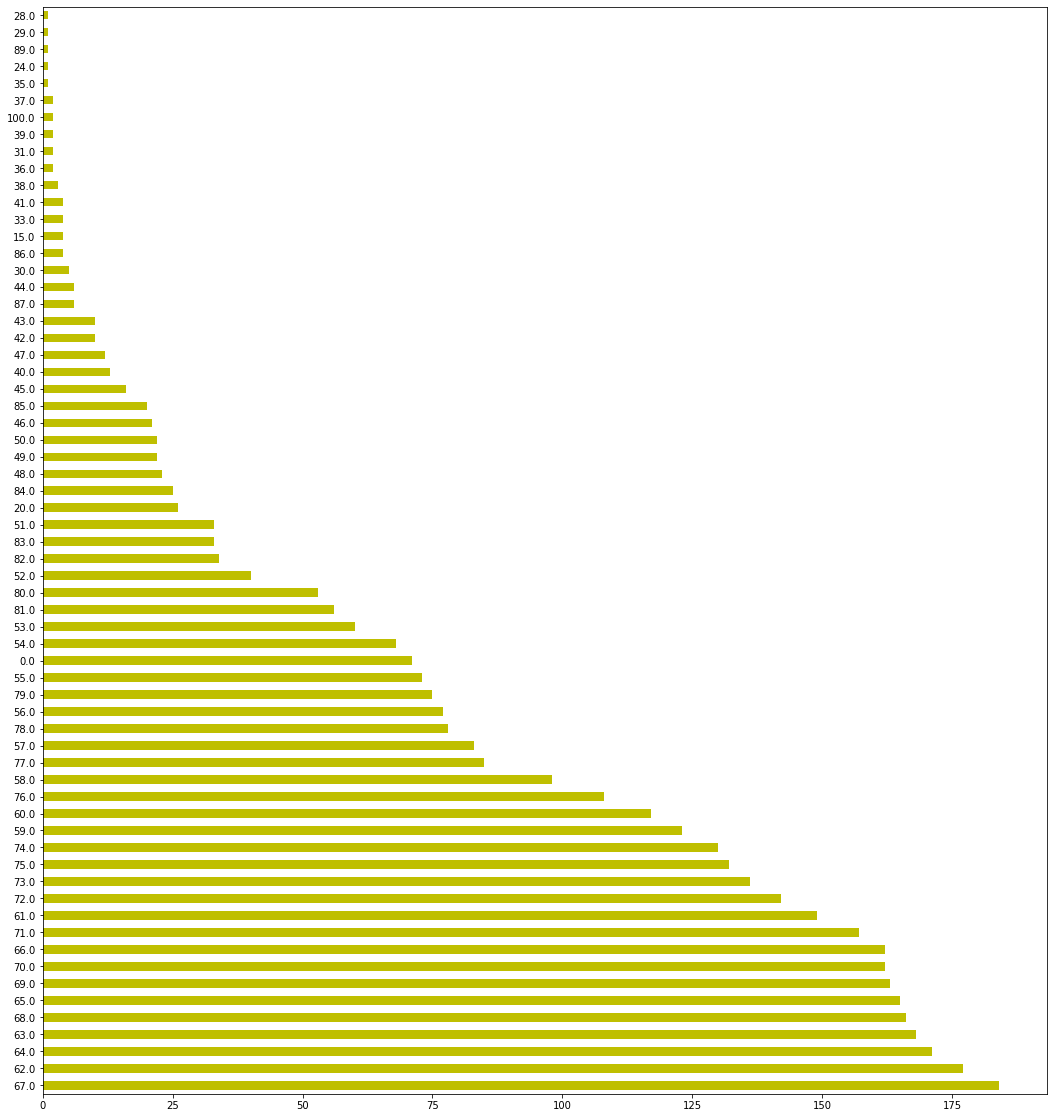

In [31]:
fig=plt.figure()
fig.set_figwidth(18)
fig.set_figheight(20)
movies_data['Movie Rating'].value_counts().plot(kind='barh',color='y')
plt.show()

In [32]:
movies_data['Runtime'].value_counts()

1h 30m    140
0         115
1h 40m    109
1h 34m    103
1h 37m     99
1h 35m     95
1h 38m     92
1h 33m     90
1h 31m     89
1h 36m     89
1h 32m     87
1h 45m     83
1h 42m     80
1h 41m     79
1h 39m     76
1h 44m     75
1h 29m     73
1h 28m     71
1h 50m     71
1h 48m     67
1h 49m     67
1h 47m     66
1h 25m     62
1h 46m     60
1h 27m     60
2h         60
1h 53m     59
1h 57m     59
1h 52m     55
1h 55m     54
         ... 
16m         1
18m         1
3h 15m      1
19m         1
3h 22m      1
29m         1
3h 14m      1
3h 49m      1
35m         1
40m         1
3h 3m       1
41m         1
3h          1
3h 10m      1
27m         1
28m         1
2h 56m      1
3h 53m      1
2h 39m      1
3h 42m      1
5m          1
49m         1
13m         1
3h 17m      1
4h 8m       1
3h 47m      1
2h 54m      1
2h 52m      1
39m         1
3h 40m      1
Name: Runtime, Length: 183, dtype: int64

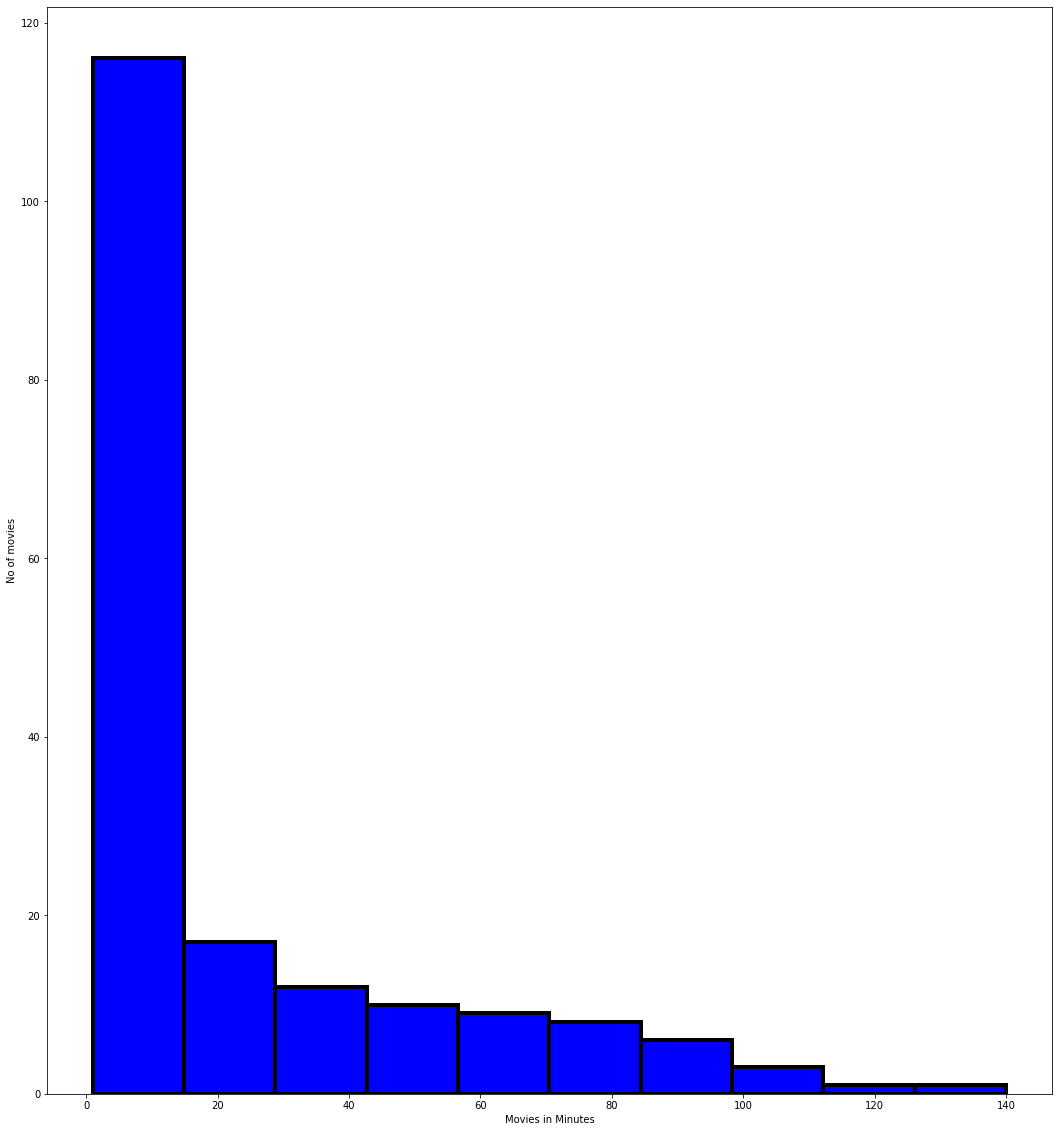

In [33]:
fig=plt.figure()
fig.set_figwidth(18)
fig.set_figheight(20)
movies_data['Runtime'].value_counts().plot(kind='hist',color='b',edgecolor='k',linewidth=4)
plt.xlabel('Movies in Minutes')
plt.ylabel('No of movies')
plt.show()

In [34]:
movies_data['Director'].value_counts()

0                           115
Steven Spielberg             20
Robert Rodriguez             15
Ridley Scott                 14
Michael Bay                  13
Antoine Fuqua                12
William Lau                  12
Tim Burton                   12
M. Night Shyamalan           11
Zack Snyder                  10
Robert Zemeckis              10
Hayao Miyazaki               10
Clint Eastwood               10
Sam Raimi                    10
Jay Oliva                     9
James Wan                     9
Sam Liu                       9
Roland Emmerich               9
Christopher Nolan             9
Steven Soderbergh             9
Guy Ritchie                   9
David Yates                   8
Martin Scorsese               8
Shigeyasu Yamauchi            8
Gore Verbinski                8
Peter Jackson                 8
Daisuke Nishio                8
Jeff Tremaine                 8
Ron Howard                    8
Doug Liman                    8
                           ... 
Rick Ros

# Group by Director and showed the particular Director Directs how many movies

In [51]:
Creater = movies_data.groupby('Director')
Creater

In [52]:
for Director , Director_movies_data in Creater:
    print(Director)
    print(Director_movies_data)

0
      Unnamed: 0                                         Movie Name  \
3885        3885                  Operation Fortune: Ruse de Guerre   
3886        3886                                Feels Like Euphoria   
3887        3887                                      Dirty Dancing   
3888        3888                                        Flight Crew   
3889        3889                                          Desperado   
3890        3890                                           Hot Fuzz   
3891        3891                                      The Aeronauts   
3892        3892                                 The School Teacher   
3893        3893                       Teenage Mutant Ninja Turtles   
3894        3894                    The Only Living Boy in New York   
3895        3895                                           Mariposa   
3896        3896                                       Inhuman Kiss   
3897        3897                                              Fargo   
3898

Aaron Seltzer
      Unnamed: 0            Movie Name  Movie Rating            Genres  \
1977        1977  From Paris with Love          62.0  Comedy, Action\n   

        Release Runtime       Director                              Movie Link  
1977 2015-04-02  1h 39m  Aaron Seltzer  https://www.themoviedb.org/movie/26389  
Aaron Sorkin
      Unnamed: 0                                  Movie Name  Movie Rating  \
2119        2119  The Kids Are Alright: Destination Asturias          48.0   
3566        3566                A.I. Artificial Intelligence          70.0   

                Genres    Release Runtime      Director  \
2119  Drama, History\n 2021-12-10  2h 12m  Aaron Sorkin   
3566    Crime, Drama\n 2018-01-05  2h 20m  Aaron Sorkin   

                                   Movie Link  
2119  https://www.themoviedb.org/movie/800823  
3566     https://www.themoviedb.org/movie/644  
Abel Ferrara
     Unnamed: 0      Movie Name  Movie Rating           Genres    Release  \
165         165

      Unnamed: 0                                         Movie Name  \
789          789           The Chronicles of Narnia: Prince Caspian   
2399        2399  Dragon Ball Z Side Story: Plan to Eradicate th...   

      Movie Rating                            Genres    Release Runtime  \
789           66.0         Action, Thriller, Drama\n 2019-09-20  1h 29m   
2399          64.0  Action, Thriller, Crime, Drama\n 2012-06-22  1h 36m   

             Director                               Movie Link  
789   Adrian Grünberg    https://www.themoviedb.org/movie/2454  
2399  Adrian Grünberg  https://www.themoviedb.org/movie/652754  
Adrian Langley
     Unnamed: 0       Movie Name  Movie Rating    Genres    Release Runtime  \
779         779  The Seventh Day          55.0  Horror\n 2021-01-12  1h 33m   

           Director                               Movie Link  
779  Adrian Langley  https://www.themoviedb.org/movie/645856  
Adrian Lyne
      Unnamed: 0                                   Mo

    Unnamed: 0           Movie Name  Movie Rating    Genres    Release  \
86          86  The Exorcism of God          66.0  Horror\n 2022-02-10   

   Runtime           Director                               Movie Link  
86  1h 38m  Alejandro Hidalgo  https://www.themoviedb.org/movie/836225  
Alejandro Loayza Grisi
      Unnamed: 0 Movie Name  Movie Rating   Genres    Release Runtime  \
3201        3201      Puzhu          80.0  Drama\n 2022-05-11  1h 27m   

                    Director                               Movie Link  
3201  Alejandro Loayza Grisi  https://www.themoviedb.org/movie/803626  
Alejandro Lozano
     Unnamed: 0 Movie Name  Movie Rating                       Genres  \
302         302      Mulan          70.0  Action, Comedy, Adventure\n   

       Release Runtime          Director  \
302 2021-10-01  1h 42m  Alejandro Lozano   

                                  Movie Link  
302  https://www.themoviedb.org/movie/337401  
Alejandro Montiel
      Unnamed: 0 Movie Nam

3393  Alexandr Babaev  https://www.themoviedb.org/movie/673319  
Alexandr Domogarov Jr.
      Unnamed: 0    Movie Name  Movie Rating             Genres    Release  \
1875        1875  Tomorrowland          62.0  Family, Romance\n 2021-03-18   

     Runtime                Director                               Movie Link  
1875  1h 50m  Alexandr Domogarov Jr.  https://www.themoviedb.org/movie/158852  
Alexandre Aja
      Unnamed: 0                          Movie Name  Movie Rating  \
1251        1251              The Fault in Our Stars          76.0   
1766        1766                            Dolittle          67.0   
1960        1960  Journey to the Center of the Earth          60.0   
1961        1961                     Flora & Ulysses          66.0   
2419        2419                      Kung Fu Hustle          74.0   

                                   Genres    Release Runtime       Director  \
1251                   Horror, Thriller\n 2006-03-10  1h 47m  Alexandre Aja   
17

185  Andres Beltran  https://www.themoviedb.org/movie/775943  
Andrew Adamson
     Unnamed: 0                                Movie Name  Movie Rating  \
259         259                                      Thor          68.0   
558         558  Pokémon the Movie: Secrets of the Jungle          71.0   
776         776                                     Brave          70.0   

                                              Genres    Release Runtime  \
259  Animation, Comedy, Fantasy, Adventure, Family\n 2001-05-18  1h 30m   
558                     Adventure, Family, Fantasy\n 2005-12-09  2h 23m   
776                     Adventure, Family, Fantasy\n 2008-05-16  2h 30m   

           Director                               Movie Link  
259  Andrew Adamson   https://www.themoviedb.org/movie/10195  
558  Andrew Adamson  https://www.themoviedb.org/movie/662708  
776  Andrew Adamson   https://www.themoviedb.org/movie/62177  
Andrew Baird
     Unnamed: 0                     Movie Name  Movie R

1107  https://www.themoviedb.org/movie/396422  
Anna Mastro
      Unnamed: 0    Movie Name  Movie Rating  \
1208        1208  Death Race 2          58.0   

                                    Genres    Release Runtime     Director  \
1208  Action, Adventure, Comedy, Fantasy\n 2020-09-25  1h 37m  Anna Mastro   

                                  Movie Link  
1208  https://www.themoviedb.org/movie/51620  
Anna Zielinski
      Unnamed: 0              Movie Name  Movie Rating            Genres  \
1203        1203  The Godfather: Part II          86.0  Fantasy, Drama\n   

        Release Runtime        Director                            Movie Link  
1203 2013-10-01  1h 28m  Anna Zielinski  https://www.themoviedb.org/movie/240  
Anne Fletcher
      Unnamed: 0                             Movie Name  Movie Rating  \
463          463  The Lord of the Rings: The Two Towers          84.0   
1963        1963                           Pearl Harbor          69.0   
3881        3881               

2245  https://www.themoviedb.org/movie/442062  
Ascanio Malgarini
     Unnamed: 0  Movie Name  Movie Rating              Genres    Release  \
314         314  Separation          57.0  Horror, Thriller\n 2013-06-21   

    Runtime           Director                               Movie Link  
314  1h 27m  Ascanio Malgarini  https://www.themoviedb.org/movie/760195  
Asger Leth
      Unnamed: 0   Movie Name  Movie Rating                     Genres  \
1169        1169  Robin Robin          71.0  Action, Thriller, Crime\n   

        Release Runtime    Director                               Movie Link  
1169 2012-02-03  1h 42m  Asger Leth  https://www.themoviedb.org/movie/649928  
Ashley Eakin
     Unnamed: 0             Movie Name  Movie Rating        Genres    Release  \
728         728  Pacific Rim: Uprising          61.0  Drama, War\n 2022-02-17   

    Runtime      Director                               Movie Link  
728     14m  Ashley Eakin  https://www.themoviedb.org/movie/268896  
A

570  https://www.themoviedb.org/movie/39103  
Ben Demaree
      Unnamed: 0 Movie Name  Movie Rating    Genres    Release Runtime  \
3622        3622    Krampus          61.0  Horror\n 2018-05-05  1h 35m   

         Director                               Movie Link  
3622  Ben Demaree  https://www.themoviedb.org/movie/287903  
Ben Falcone
      Unnamed: 0            Movie Name  Movie Rating  \
1149        1149      Django Unchained          81.0   
3245        3245  Dead Space: Downfall          61.0   

                                            Genres    Release Runtime  \
1149  Action, Adventure, Comedy, Science Fiction\n 2021-04-09  1h 47m   
3245                                      Comedy\n 2014-07-03  1h 37m   

         Director                              Movie Link  
1149  Ben Falcone  https://www.themoviedb.org/movie/68718  
3245  Ben Falcone  https://www.themoviedb.org/movie/13190  
Ben Foster
      Unnamed: 0                                        Movie Name  \
2368     

870  https://www.themoviedb.org/movie/710871  
Bill Kopp
      Unnamed: 0                      Movie Name  Movie Rating  \
1036        1036  The Nightmare Before Christmas          78.0   

                                              Genres    Release Runtime  \
1036  Family, Animation, Comedy, Action, Adventure\n 2005-10-11  1h 15m   

       Director                             Movie Link  
1036  Bill Kopp  https://www.themoviedb.org/movie/9479  
Bille Woodruff
      Unnamed: 0       Movie Name  Movie Rating  \
2061        2061       The Unborn          52.0   
3392        3392       Sinister 2          58.0   
3567        3567  Pet Sematary II          53.0   

                               Genres    Release Runtime        Director  \
2061                Drama, Thriller\n 2014-10-10  1h 45m  Bille Woodruff   
3392           Music, Comedy, Drama\n 2011-08-01  1h 50m  Bille Woodruff   
3567  Music, Drama, Family, Romance\n 2016-11-30  1h 37m  Bille Woodruff   

                    

      Unnamed: 0            Movie Name  Movie Rating  \
1459        1459  This Is Not a Comedy          62.0   

                                             Genres    Release Runtime  \
1459  Fantasy, Action, Adventure, Science Fiction\n 2015-10-23  1h 46m   

          Director                               Movie Link  
1459  Breck Eisner  https://www.themoviedb.org/movie/881594  
Brendan Muldowney
      Unnamed: 0               Movie Name  Movie Rating  \
2015        2015            Double Impact          60.0   
3700        3700  Atlantis: Milo's Return          62.0   

                          Genres    Release Runtime           Director  \
2015           Horror, Mystery\n 2022-03-25  1h 34m  Brendan Muldowney   
3700  Action, Adventure, Drama\n 2017-07-13  1h 36m  Brendan Muldowney   

                                 Movie Link  
2015  https://www.themoviedb.org/movie/9594  
3700  https://www.themoviedb.org/movie/8965  
Brent Bonacorso
      Unnamed: 0 Movie Name  Movie Rating

2735  Bryan Singer  https://www.themoviedb.org/movie/333371  
Bryan Spicer
      Unnamed: 0     Movie Name  Movie Rating  \
3860        3860  Another Gantz          73.0   

                                                 Genres    Release Runtime  \
3860  Family, Action, Adventure, Science Fiction, Fa... 1995-06-30  1h 32m   

          Director                               Movie Link  
3860  Bryan Spicer  https://www.themoviedb.org/movie/244478  
Bryan Woods
      Unnamed: 0             Movie Name  Movie Rating              Genres  \
3128        3128  Planes: Fire & Rescue          61.0  Horror, Thriller\n   

        Release Runtime     Director                               Movie Link  
3128 2019-09-13  1h 32m  Bryan Woods  https://www.themoviedb.org/movie/218836  
Bryce Wagoner
      Unnamed: 0                          Movie Name  Movie Rating  \
574          574                         Constantine          70.0   
2307        2307  One Piece: Adventure of Nebulandia          74

      Unnamed: 0 Movie Name  Movie Rating                  Genres    Release  \
2291        2291    A Gruta          64.0  Action, Crime, Drama\n 2021-05-14   

     Runtime           Director                               Movie Link  
2291  1h 46m  Cecilia Verheyden  https://www.themoviedb.org/movie/758510  
Cedric Nicolas-Troyan
      Unnamed: 0                   Movie Name  Movie Rating  \
746          746  I Want to Eat Your Pancreas          83.0   
2352        2352           Single All the Way          65.0   

                          Genres    Release Runtime               Director  \
746                     Action\n 2021-09-10  1h 46m  Cedric Nicolas-Troyan   
2352  Action, Adventure, Drama\n 2016-04-22  1h 54m  Cedric Nicolas-Troyan   

                                   Movie Link  
746   https://www.themoviedb.org/movie/504253  
2352  https://www.themoviedb.org/movie/810873  
Chad Stahelski
     Unnamed: 0      Movie Name  Movie Rating                     Genres  \
531    

1277  Chris Buck    https://www.themoviedb.org/movie/5559  
Chris Butler
      Unnamed: 0                Movie Name  Movie Rating  \
2717        2717  The Grand Budapest Hotel          81.0   

                                               Genres    Release Runtime  \
2717  Family, Animation, Comedy, Adventure, Fantasy\n 2019-04-12  1h 35m   

          Director                               Movie Link  
2717  Chris Butler  https://www.themoviedb.org/movie/120467  
Chris Chapman
     Unnamed: 0                 Movie Name  Movie Rating         Genres  \
365         365  A Silent Voice: The Movie          84.0  Documentary\n   

       Release Runtime       Director                               Movie Link  
365 2022-04-07     58m  Chris Chapman  https://www.themoviedb.org/movie/378064  
Chris Columbus
      Unnamed: 0                                  Movie Name  Movie Rating  \
142          142    Harry Potter and the Philosopher's Stone          79.0   
171          171     Harry Pott

2126   https://www.themoviedb.org/movie/12222  
Christopher Nolan
      Unnamed: 0                  Movie Name  Movie Rating  \
404          404             SAS: Red Notice          59.0   
465          465                   Predators          62.0   
529          529          Terminator Genisys          59.0   
591          591            Jeepers Creepers          64.0   
662          662           Mission: Possible          77.0   
698          698  Female Doctor: Flesh Slave          20.0   
2696        2696                   Mortdecai          55.0   
3014        3014                  Studio 666          67.0   
3289        3289               No Man of God          67.0   

                                    Genres    Release Runtime  \
404    Adventure, Drama, Science Fiction\n 2014-11-07  2h 49m   
465   Action, Science Fiction, Adventure\n 2010-07-16  2h 28m   
529       Action, Crime, Drama, Thriller\n 2012-07-20  2h 45m   
591       Drama, Action, Crime, Thriller\n 2008-07-18

3741 2020-08-14  1h 29m  Cory Edwards  https://www.themoviedb.org/movie/785516  
Craig Brewer
      Unnamed: 0                         Movie Name  Movie Rating  \
1232        1232  Cloudy with a Chance of Meatballs          66.0   
3709        3709                          Spartacus          75.0   

                       Genres    Release Runtime      Director  \
1232                 Comedy\n 2021-03-04  1h 50m  Craig Brewer   
3709  Drama, Music, Romance\n 2011-10-14  1h 53m  Craig Brewer   

                                  Movie Link  
1232  https://www.themoviedb.org/movie/22794  
3709    https://www.themoviedb.org/movie/967  
Craig David Wallace
     Unnamed: 0        Movie Name  Movie Rating              Genres  \
260         260  Catwoman: Hunted          59.0  Thriller, Horror\n   

       Release Runtime             Director  \
260 2021-09-21  1h 30m  Craig David Wallace   

                                  Movie Link  
260  https://www.themoviedb.org/movie/862491  
Craig 

2176     https://www.themoviedb.org/movie/103  
Daniel Chong
     Unnamed: 0     Movie Name  Movie Rating  \
725         725  The 8th Night          61.0   

                                               Genres    Release Runtime  \
725  Family, Animation, Adventure, Comedy, TV Movie\n 2020-06-30   1h 9m   

         Director                               Movie Link  
725  Daniel Chong  https://www.themoviedb.org/movie/604360  
Daniel Espinosa
      Unnamed: 0                               Movie Name  Movie Rating  \
39            39                                  Morbius          59.0   
2374        2374  Guinea Pig 2: Flower of Flesh and Blood          47.0   
2971        2971        Next Avengers: Heroes of Tomorrow          69.0   

                                   Genres    Release Runtime         Director  \
39     Action, Science Fiction, Fantasy\n 2022-04-01  1h 44m  Daniel Espinosa   
2374                    Crime, Thriller\n 2015-04-16  2h 17m  Daniel Espinosa   
2971  H

      Unnamed: 0 Movie Name  Movie Rating                     Genres  \
1379        1379    La Casa          64.0  Action, Science Fiction\n   

        Release Runtime     Director                               Movie Link  
1379 2020-03-13  1h 50m  Dave Wilson  https://www.themoviedb.org/movie/648990  
David A.R. White
      Unnamed: 0 Movie Name  Movie Rating   Genres    Release Runtime  \
3336        3336       Nico           0.0  Drama\n 2013-05-31  1h 30m   

              Director                               Movie Link  
3336  David A.R. White  https://www.themoviedb.org/movie/777947  
David Alonso Pérez de Algaba
      Unnamed: 0   Movie Name  Movie Rating  \
2996        2996  Finding You          66.0   

                                      Genres    Release Runtime  \
2996  Animation, Adventure, Comedy, Family\n 2017-08-25  1h 25m   

                          Director                               Movie Link  
2996  David Alonso Pérez de Algaba  https://www.themoviedb.org

757  https://www.themoviedb.org/movie/131634  
David Lowery
      Unnamed: 0                             Movie Name  Movie Rating  \
2459        2459  Evangelion: 2.0 You Can (Not) Advance          79.0   
3844        3844                           Ender's Game          66.0   

                            Genres    Release Runtime      Director  \
2459   Adventure, Drama, Fantasy\n 2021-08-27  2h 10m  David Lowery   
3844  Adventure, Family, Fantasy\n 2016-08-12  1h 43m  David Lowery   

                                  Movie Link  
2459  https://www.themoviedb.org/movie/22843  
3844  https://www.themoviedb.org/movie/80274  
David Lynch
      Unnamed: 0    Movie Name  Movie Rating  \
1740        1740  Leprechaun 3          60.0   

                                    Genres    Release Runtime     Director  \
1740  Action, Science Fiction, Adventure\n 1984-12-14  2h 17m  David Lynch   

                                  Movie Link  
1740  https://www.themoviedb.org/movie/19286  
David

1654  https://www.themoviedb.org/movie/11359  
Dean Israelite
      Unnamed: 0              Movie Name  Movie Rating  \
1216        1216  300: Rise of an Empire          61.0   
1694        1694               The Witch          69.0   

                                    Genres    Release Runtime        Director  \
1216  Science Fiction, Action, Adventure\n 2017-03-31   2h 4m  Dean Israelite   
1694    Science Fiction, Thriller, Drama\n 2015-01-30  1h 46m  Dean Israelite   

                                   Movie Link  
1216   https://www.themoviedb.org/movie/53182  
1694  https://www.themoviedb.org/movie/310131  
Dean Parisot
      Unnamed: 0             Movie Name  Movie Rating  \
1631        1631          Hunter Killer          68.0   
3744        3744  The Forbidden Kingdom          66.0   

                                 Genres    Release Runtime      Director  \
1631  Action, Comedy, Crime, Thriller\n 2013-07-18  1h 56m  Dean Parisot   
3744                           Comedy\

3463  Don Michael Paul  https://www.themoviedb.org/movie/575322  
Don Paul
      Unnamed: 0  Movie Name  Movie Rating  \
1623        1623     The Day          51.0   
1624        1624  The Grudge          59.0   

                                              Genres    Release Runtime  \
1623  Family, Adventure, Animation, Comedy, Action\n 2000-03-31  1h 29m   
1624  Animation, TV Movie, Action, Comedy, Fantasy\n 2021-03-13     45m   

      Director                              Movie Link  
1623  Don Paul  https://www.themoviedb.org/movie/84226  
1624  Don Paul   https://www.themoviedb.org/movie/1970  
Don Siegel
      Unnamed: 0 Movie Name  Movie Rating             Genres    Release  \
3280        3280   Our Home           0.0  Drama, Thriller\n 1979-06-22   

     Runtime    Director                               Movie Link  
3280  1h 53m  Don Siegel  https://www.themoviedb.org/movie/913820  
Donald Petrie
      Unnamed: 0   Movie Name  Movie Rating            Genres    Release  \
2

      Unnamed: 0  Movie Name  Movie Rating  \
322          322  Heart Shot          53.0   
1630        1630   Intersect          58.0   

                                               Genres    Release Runtime  \
322           Animation, Adventure, Family, Western\n 2021-06-04  1h 28m   
1630  Animation, Family, Adventure, Comedy, Fantasy\n 2015-05-26     26m   

          Director                               Movie Link  
322   Elaine Bogan  https://www.themoviedb.org/movie/929477  
1630  Elaine Bogan  https://www.themoviedb.org/movie/736509  
Elan Dassani
      Unnamed: 0       Movie Name  Movie Rating                       Genres  \
1871        1871  A Dog's Journey          81.0  Mystery, Thriller, Horror\n   

        Release Runtime      Director                               Movie Link  
1871 2020-04-01  1h 30m  Elan Dassani  https://www.themoviedb.org/movie/522518  
Eli Cross
      Unnamed: 0 Movie Name  Movie Rating         Genres    Release Runtime  \
2231        2231    B

2434  Erik Van Looy  https://www.themoviedb.org/movie/699102  
Ernesto Contreras
      Unnamed: 0                     Movie Name  Movie Rating  \
2782        2782  The Texas Chainsaw Massacre 2          56.0   

               Genres    Release Runtime           Director  \
2782  Family, Drama\n 2021-06-17  1h 29m  Ernesto Contreras   

                                  Movie Link  
2782  https://www.themoviedb.org/movie/16337  
Ernie Barbarash
      Unnamed: 0                           Movie Name  Movie Rating  \
2192        2192     Sinbad: Legend of the Seven Seas          69.0   
3125        3125  Wizards of Waverly Place: The Movie          66.0   
3611        3611                       Diego Maradona          75.0   
3818        3818                                 Leal          69.0   

                          Genres    Release Runtime         Director  \
2192   Thriller, Action, Crime\n 2012-09-11  1h 55m  Ernie Barbarash   
3125   Action, Thriller, Crime\n 2011-01-04  1h 41m

3581  Fernando León de Aranoa  https://www.themoviedb.org/movie/7340  
Fernando Meirelles
      Unnamed: 0               Movie Name  Movie Rating          Genres  \
2358        2358  Silver Linings Playbook          71.0  Drama, Crime\n   

        Release Runtime            Director  \
2358 2007-01-18  2h 10m  Fernando Meirelles   

                                  Movie Link  
2358  https://www.themoviedb.org/movie/82693  
Fisher Stevens
      Unnamed: 0  Movie Name  Movie Rating         Genres    Release Runtime  \
1437        1437  The Rental          56.0        Drama\n 2021-01-29  1h 50m   
3585        3585        Taxi          55.0  Documentary\n 2016-10-30  1h 33m   

            Director                               Movie Link  
1437  Fisher Stevens  https://www.themoviedb.org/movie/587496  
3585  Fisher Stevens   https://www.themoviedb.org/movie/11045  
Florian Henckel von Donnersmarck
     Unnamed: 0            Movie Name  Movie Rating  \
826         826  Ant-Man and the W

213 2022-03-18  1h 47m  Gail Lerner  https://www.themoviedb.org/movie/691683  
Gail Mancuso
      Unnamed: 0           Movie Name  Movie Rating  \
1831        1831  The Prince of Egypt          72.0   

                          Genres    Release Runtime      Director  \
1831  Family, Adventure, Drama\n 2019-05-30  1h 49m  Gail Mancuso   

                                 Movie Link  
1831  https://www.themoviedb.org/movie/9837  
Galder Gaztelu-Urrutia
      Unnamed: 0   Movie Name  Movie Rating  \
1411        1411  After Earth          52.0   

                                  Genres    Release Runtime  \
1411  Drama, Science Fiction, Thriller\n 2019-11-08  1h 35m   

                    Director                              Movie Link  
1411  Galder Gaztelu-Urrutia  https://www.themoviedb.org/movie/82700  
Gareth Edwards
      Unnamed: 0      Movie Name  Movie Rating  \
908          908       Peninsula          69.0   
1759        1759  Tropic Thunder          66.0   

             

3179  https://www.themoviedb.org/movie/366924  
George Tillman, Jr.
      Unnamed: 0          Movie Name  Movie Rating  \
2102        2102      Step Up All In          68.0   
3072        3072  Leprechaun Returns          60.0   
3270        3270          Los viejos          40.0   
3407        3407           Octopussy          63.0   

                                Genres    Release Runtime  \
2102                           Drama\n 2001-02-09   2h 9m   
3072  Crime, Drama, Action, Thriller\n 2010-11-23  1h 38m   
3270                  Drama, Romance\n 2015-04-10   2h 8m   
3407                    Crime, Drama\n 2018-10-19  2h 13m   

                 Director                               Movie Link  
2102  George Tillman, Jr.  https://www.themoviedb.org/movie/243683  
3072  George Tillman, Jr.  https://www.themoviedb.org/movie/518158  
3270  George Tillman, Jr.  https://www.themoviedb.org/movie/288905  
3407  George Tillman, Jr.     https://www.themoviedb.org/movie/700  
Gerard Bus

1303    https://www.themoviedb.org/movie/1371  
Greg Strause
      Unnamed: 0               Movie Name  Movie Rating  \
1008        1008  Spy Kids 3-D: Game Over          51.0   
1424        1424   I Spit on Your Grave 2          63.0   

                                                 Genres    Release Runtime  \
1008                          Science Fiction, Action\n 2010-11-12  1h 32m   
1424  Fantasy, Action, Science Fiction, Thriller, Ho... 2007-12-25  1h 34m   

          Director                               Movie Link  
1008  Greg Strause   https://www.themoviedb.org/movie/12279  
1424  Greg Strause  https://www.themoviedb.org/movie/207768  
Greg Tiernan
      Unnamed: 0                                       Movie Name  \
175          175                              The Addams Family 2   
1423        1423  Fate/kaleid liner Prisma☆Illya: Vow in the Snow   

      Movie Rating                                  Genres    Release Runtime  \
175           71.0  Animation, Adventu

Hamilton Luske
     Unnamed: 0         Movie Name  Movie Rating  \
333         333           Vanguard          63.0   
616         616  The Kissing Booth          73.0   

                                      Genres    Release Runtime  \
333    Family, Fantasy, Animation, Romance\n 1950-03-04  1h 14m   
616  Animation, Family, Fantasy, Adventure\n 1951-09-14  1h 15m   

           Director                               Movie Link  
333  Hamilton Luske  https://www.themoviedb.org/movie/604822  
616  Hamilton Luske  https://www.themoviedb.org/movie/454983  
Hamish Grieve
      Unnamed: 0        Movie Name  Movie Rating                       Genres  \
2377        2377  Little Tornadoes           0.0  Family, Comedy, Animation\n   

        Release Runtime       Director  \
2377 2021-12-15  1h 35m  Hamish Grieve   

                                   Movie Link  
2377  https://www.themoviedb.org/movie/842229  
Hank Braxtan
     Unnamed: 0     Movie Name  Movie Rating  \
234         234  J

3618  https://www.themoviedb.org/movie/1991  
Henry Hobson
      Unnamed: 0           Movie Name  Movie Rating                    Genres  \
3564        3564  The Next Karate Kid          53.0  Horror, Drama, Mystery\n   

        Release Runtime      Director                              Movie Link  
3564 2015-05-08  1h 35m  Henry Hobson  https://www.themoviedb.org/movie/11231  
Henry Joost
      Unnamed: 0        Movie Name  Movie Rating  \
1536        1536         Ghostland          73.0   
3365        3365       The Wolfman          58.0   
3383        3383  Once Upon a Time          73.0   

                                Genres    Release Runtime     Director  \
1536                 Horror, Mystery\n 2011-10-21  1h 34m  Henry Joost   
3365                          Horror\n 2012-10-19  1h 37m  Henry Joost   
3383  Action, Crime, Science Fiction\n 2020-08-14  1h 53m  Henry Joost   

                                   Movie Link  
1536  https://www.themoviedb.org/movie/476299  
3365

1214 2015-11-22     44m  Howy Parkins  https://www.themoviedb.org/movie/9444  
Huck Botko
      Unnamed: 0            Movie Name  Movie Rating    Genres    Release  \
1944        1944  Career Opportunities          68.0  Comedy\n 2010-09-24   

     Runtime    Director                              Movie Link  
1944      2h  Huck Botko  https://www.themoviedb.org/movie/16270  
Hur Jin-ho
      Unnamed: 0    Movie Name  Movie Rating            Genres    Release  \
3255        3255  Welcome Home          52.0  Drama, History\n 2016-08-03   

     Runtime    Director                               Movie Link  
3255   2h 7m  Hur Jin-ho  https://www.themoviedb.org/movie/525460  
Hèctor Hernández Vicens
      Unnamed: 0  Movie Name  Movie Rating             Genres    Release  \
1577        1577  The Smurfs          58.0  Drama, Thriller\n 2015-10-30   
3334        3334    Stranded          48.0   Action, Horror\n 2017-12-29   

     Runtime                 Director                             

3286  https://www.themoviedb.org/movie/424632  
Jacinth Tan Yi Ting
      Unnamed: 0          Movie Name  Movie Rating  \
1765        1765  30 Minutes or Less          57.0   

                            Genres    Release Runtime             Director  \
1765  Animation, Fantasy, Family\n 2021-10-15     24m  Jacinth Tan Yi Ting   

                                  Movie Link  
1765  https://www.themoviedb.org/movie/62206  
Jack Bender
      Unnamed: 0   Movie Name  Movie Rating              Genres    Release  \
1308        1308  Tokyo Ghoul          70.0  Horror, Thriller\n 1991-08-30   

     Runtime     Director                               Movie Link  
1308  1h 30m  Jack Bender  https://www.themoviedb.org/movie/433945  
Jack Kinney
      Unnamed: 0                Movie Name  Movie Rating  \
737          737  We Bare Bears: The Movie          79.0   
3843        3843          Anger Management          61.0   

                              Genres    Release Runtime     Director  \


3187   https://www.themoviedb.org/movie/75629  
James Glenn Dudelson
      Unnamed: 0    Movie Name  Movie Rating            Genres    Release  \
2985        2985  Patriots Day          70.0  Horror, Comedy\n 2006-04-24   

     Runtime              Director                               Movie Link  
2985  1h 44m  James Glenn Dudelson  https://www.themoviedb.org/movie/388399  
James Gray
      Unnamed: 0                           Movie Name  Movie Rating  \
1348        1348  American Pie Presents: Girls' Rules          64.0   

                           Genres    Release Runtime    Director  \
1348  Adventure, Drama, History\n 2017-04-21  2h 21m  James Gray   

                                   Movie Link  
1348  https://www.themoviedb.org/movie/660982  
James Gunn
      Unnamed: 0         Movie Name  Movie Rating  \
89            89  The Suicide Squad          77.0   
368          368               Deep          64.0   
1102        1102           Spy Kids          58.0   

         

      Unnamed: 0          Movie Name  Movie Rating  \
1818        1818            Polaroid          59.0   
2068        2068            Oblivion          66.0   
2069        2069               Spell          64.0   
2269        2269               Spree          66.0   
2452        2452        Crimson Peak          66.0   
2730        2730  Heaven Is for Real          66.0   
2908        2908   A Naija Christmas          70.0   
3107        3107      School of Rock          71.0   
3554        3554        Batman: Hush          73.0   

                                                 Genres    Release Runtime  \
1818  Action, Adventure, Animation, Science Fiction,... 2011-06-07  1h 24m   
2068    Science Fiction, Animation, Action, Adventure\n 2013-07-30  1h 15m   
2069                        Comedy, Family, Animation\n 2020-09-01     24m   
2269      Science Fiction, Action, Animation, Mystery\n 2012-09-25  1h 16m   
2452                                Animation, Action\n 2014-02-02  1

3415  Jeff Tremaine  https://www.themoviedb.org/movie/446021  
Jeff Wadlow
      Unnamed: 0                                      Movie Name  \
1354        1354                                   6 Underground   
1393        1393  Naruto: Guardians of the Crescent Moon Kingdom   
1764        1764               DRagON BALL P2 2wice dropda bbeet   
3722        3722                                     All for Her   

      Movie Rating                                 Genres    Release Runtime  \
1354          63.0                        Drama, Action\n 2008-03-04  1h 55m   
1393          71.0                     Thriller, Horror\n 2018-04-13  1h 40m   
1764          15.0             Action, Adventure, Crime\n 2013-08-16  1h 43m   
3722          47.0  Horror, Fantasy, Adventure, Mystery\n 2020-02-27  1h 49m   

         Director                               Movie Link  
1354  Jeff Wadlow  https://www.themoviedb.org/movie/509967  
1393  Jeff Wadlow   https://www.themoviedb.org/movie/18861  


3847  https://www.themoviedb.org/movie/462650  
Jim Fall
      Unnamed: 0               Movie Name  Movie Rating            Genres  \
3773        3773  Love Don't Co$t a Thing          70.0  Family, Comedy\n   

        Release Runtime  Director                              Movie Link  
3773 2003-05-02  1h 34m  Jim Fall  https://www.themoviedb.org/movie/21542  
Jim Field Smith
      Unnamed: 0 Movie Name  Movie Rating             Genres    Release  \
3698        3698  Overdrive          61.0  Comedy, Romance\n 2010-03-12   

     Runtime         Director                               Movie Link  
3698  1h 44m  Jim Field Smith  https://www.themoviedb.org/movie/404733  
Jim Gillespie
      Unnamed: 0       Movie Name  Movie Rating                       Genres  \
3252        3252  The Blue Lagoon          62.0  Horror, Thriller, Mystery\n   

        Release Runtime       Director                             Movie Link  
3252 1997-10-17  1h 41m  Jim Gillespie  https://www.themoviedb.org/m

Joel Gallen
      Unnamed: 0     Movie Name  Movie Rating    Genres    Release Runtime  \
2799        2799  Los bastardos          20.0  Comedy\n 2001-12-07  1h 29m   

         Director                               Movie Link  
2799  Joel Gallen  https://www.themoviedb.org/movie/848730  
Joel Schumacher
      Unnamed: 0                         Movie Name  Movie Rating  \
2021        2021                                Spy          68.0   
2222        2222  My Extraordinary Summer with Tess          74.0   
3749        3749   Lev Yashin. The Dream Goalkeeper          80.0   

                                  Genres    Release Runtime         Director  \
2021            Action, Crime, Fantasy\n 1995-08-15   2h 1m  Joel Schumacher   
2222  Science Fiction, Action, Fantasy\n 1997-06-20   2h 5m  Joel Schumacher   
3749          Thriller, Drama, Mystery\n 2007-02-23  1h 41m  Joel Schumacher   

                                   Movie Link  
2021  https://www.themoviedb.org/movie/238713  

2939  1h 57m  John Landis  https://www.themoviedb.org/movie/3981  
John Lasseter
     Unnamed: 0                              Movie Name  Movie Rating  \
225         225                               Toy Story          80.0   
342         342                    Fifty Shades of Grey          59.0   
483         483  Yu-Gi-Oh!: The Dark Side of Dimensions          76.0   
622         622             G.I. Joe: The Rise of Cobra          58.0   
809         809          One Hundred and One Dalmatians          72.0   

                                     Genres    Release Runtime       Director  \
225  Animation, Adventure, Family, Comedy\n 1995-11-22  1h 21m  John Lasseter   
342             Animation, Comedy, Family\n 1999-11-24  1h 32m  John Lasseter   
483  Animation, Family, Adventure, Comedy\n 2011-06-16  1h 46m  John Lasseter   
622  Adventure, Animation, Comedy, Family\n 1998-11-25  1h 35m  John Lasseter   
809  Animation, Adventure, Comedy, Family\n 2006-08-04  1h 57m  John Lasset

      Unnamed: 0                              Movie Name  Movie Rating  \
2982        2982  My Hero Academia: Training of the Dead           0.0   

                             Genres    Release Runtime    Director  \
2982  Adventure, Horror, Thriller\n 2010-04-27  1h 34m  Jon Harris   

                                   Movie Link  
2982  https://www.themoviedb.org/movie/968466  
Jon Keeyes
     Unnamed: 0   Movie Name  Movie Rating              Genres    Release  \
294         294  Firestarter          78.0  Action, Thriller\n 2021-06-11   

    Runtime    Director                               Movie Link  
294  1h 34m  Jon Keeyes  https://www.themoviedb.org/movie/532710  
Jon M. Chu
      Unnamed: 0                                        Movie Name  \
1440        1440                                          Blade II   
1861        1861  Maggie Simpson in The Force Awakens from Its Nap   
2154        2154                                    Into the Storm   
2171        2171       

892  1h 37m  Josh Ruben  https://www.themoviedb.org/movie/680860  
Josh Safdie
      Unnamed: 0                       Movie Name  Movie Rating  \
2952        2952  Rurouni Kenshin Part I: Origins          76.0   

                        Genres    Release Runtime     Director  \
2952  Drama, Thriller, Crime\n 2019-12-25  2h 16m  Josh Safdie   

                                   Movie Link  
2952  https://www.themoviedb.org/movie/127533  
Josh Sternfeld
    Unnamed: 0              Movie Name  Movie Rating           Genres  \
15          15  Fortress: Sniper's Eye          60.0  Crime, Action\n   

      Release Runtime        Director                               Movie Link  
15 2022-04-29  1h 27m  Josh Sternfeld  https://www.themoviedb.org/movie/883502  
Josh Trank
     Unnamed: 0     Movie Name  Movie Rating  \
851         851  The Godfather          87.0   

                                 Genres    Release Runtime    Director  \
851  Science Fiction, Drama, Thriller\n 2012-02-03 

1636  https://www.themoviedb.org/movie/726208  
Justin Chadwick
      Unnamed: 0 Movie Name  Movie Rating            Genres    Release  \
3617        3617      Naked          57.0  Drama, Romance\n 2008-02-28   

     Runtime         Director                               Movie Link  
3617  1h 55m  Justin Chadwick  https://www.themoviedb.org/movie/433251  
Justin Chon
      Unnamed: 0                              Movie Name  Movie Rating  \
3101        3101  To All the Boys: P.S. I Still Love You          69.0   

       Genres    Release Runtime     Director  \
3101  Drama\n 2021-09-17  1h 57m  Justin Chon   

                                   Movie Link  
3101  https://www.themoviedb.org/movie/565426  
Justin Copeland
      Unnamed: 0  Movie Name  Movie Rating  \
3457        3457  Flightplan          64.0   

                                                 Genres    Release Runtime  \
3457  Science Fiction, Crime, Animation, Mystery, Ac... 2019-07-20  1h 22m   

             Direct

3810  Kazuya Murata  https://www.themoviedb.org/movie/46738  
Kazuya Tsurumaki
      Unnamed: 0                  Movie Name  Movie Rating  \
2063        2063                I Care a Lot          66.0   
2796        2796  Godzilla: The Planet Eater          65.0   

                                           Genres    Release Runtime  \
2063  Drama, Science Fiction, Animation, Action\n 1997-07-19  1h 27m   
2796          Drama, Science Fiction, Animation\n 1997-03-15  1h 41m   

              Director                               Movie Link  
2063  Kazuya Tsurumaki  https://www.themoviedb.org/movie/601666  
2796  Kazuya Tsurumaki  https://www.themoviedb.org/movie/536115  
Keanu Reeves
      Unnamed: 0   Movie Name  Movie Rating           Genres    Release  \
2263        2263  Role Models          65.0  Action, Drama\n 2013-07-05   

     Runtime      Director                              Movie Link  
2263  1h 45m  Keanu Reeves  https://www.themoviedb.org/movie/15373  
Keenen Ivory Waya

546  Kevin Nolting  https://www.themoviedb.org/movie/575249  
Kevin Reynolds
      Unnamed: 0                                 Movie Name  Movie Rating  \
2734        2734                         Dead Poets Society          83.0   
3141        3141  Pokémon 3: The Movie - Spell of the Unown          64.0   
3559        3559                                      Messi          72.0   

                                    Genres    Release Runtime        Director  \
2734                      Drama, History\n 2016-02-19  1h 47m  Kevin Reynolds   
3141           Adventure, Drama, History\n 2002-01-23  2h 11m  Kevin Reynolds   
3559  Adventure, Action, Science Fiction\n 1995-07-28  2h 15m  Kevin Reynolds   

                                   Movie Link  
2734     https://www.themoviedb.org/movie/207  
3141   https://www.themoviedb.org/movie/10991  
3559  https://www.themoviedb.org/movie/283317  
Kevin Smith
      Unnamed: 0                  Movie Name  Movie Rating            Genres  \
607  

881  Kirk DeMicco  https://www.themoviedb.org/movie/158015  
Kirk Jones
      Unnamed: 0   Movie Name  Movie Rating                     Genres  \
2599        2599  Sexy Comedy          53.0  Fantasy, Comedy, Family\n   

        Release Runtime    Director                               Movie Link  
2599 2005-10-21  1h 37m  Kirk Jones  https://www.themoviedb.org/movie/156143  
Kirk R. Thatcher
      Unnamed: 0           Movie Name  Movie Rating  \
1484        1484  The Jack in the Box          55.0   

                          Genres    Release Runtime          Director  \
1484  Comedy, Family, TV Movie\n 2021-10-08     52m  Kirk R. Thatcher   

                                   Movie Link  
1484  https://www.themoviedb.org/movie/622420  
Kirk Wise
      Unnamed: 0                           Movie Name  Movie Rating  \
523          523       Psycho-Pass 3: First Inspector          76.0   
1750        1750                Miracle in Cell No. 7          83.0   
2092        2092  The Curio

1125  1h 43m  Laurent Bouhnik  https://www.themoviedb.org/movie/34544  
Laurent Bouzereau
      Unnamed: 0  Movie Name  Movie Rating  \
2999        2999  La La Land          79.0   

                                          Genres    Release Runtime  \
2999  Documentary, Action, Adventure, Thriller\n 2011-02-05   2h 9m   

               Director                               Movie Link  
2999  Laurent Bouzereau  https://www.themoviedb.org/movie/313369  
Lauri Nurkse
      Unnamed: 0      Movie Name  Movie Rating          Genres    Release  \
3432        3432  Going in Style          67.0  Crime, Drama\n 2022-05-11   

     Runtime      Director                               Movie Link  
3432  1h 25m  Lauri Nurkse  https://www.themoviedb.org/movie/353070  
Lawrence Fowler
      Unnamed: 0                      Movie Name  Movie Rating    Genres  \
36            36  The Jack in the Box: Awakening          62.0  Horror\n   
1456        1456             Death Race: Inferno          58.0  

2844  https://www.themoviedb.org/movie/294652  
Leigh WhannellCharacters, 
      Unnamed: 0              Movie Name  Movie Rating  \
1570        1570  Walking with Dinosaurs          60.0   

                         Genres    Release Runtime  \
1570  Horror, Drama, Thriller\n 2015-06-05  1h 37m   

                        Director                              Movie Link  
1570  Leigh WhannellCharacters,   https://www.themoviedb.org/movie/77951  
Leire Apellániz
      Unnamed: 0                   Movie Name  Movie Rating         Genres  \
3756        3756  Monster High: Freaky Fusion          77.0  Documentary\n   

        Release Runtime         Director  \
3756 2022-02-04  1h 34m  Leire Apellániz   

                                   Movie Link  
3756  https://www.themoviedb.org/movie/290727  
Len Wiseman
      Unnamed: 0                        Movie Name  Movie Rating  \
1132        1132  50 Greatest Harry Potter Moments          80.0   
2072        2072                 The Spy Ne

     Unnamed: 0                Movie Name  Movie Rating             Genres  \
514         514  From Straight A's to XXX          56.0  Science Fiction\n   

       Release Runtime        Director  \
514 2020-08-31  1h 29m  Luke Armstrong   

                                  Movie Link  
514  https://www.themoviedb.org/movie/441168  
Luke Greenfield
      Unnamed: 0    Movie Name  Movie Rating             Genres    Release  \
984          984  Stan Helsing          43.0           Comedy\n 2014-08-13   
1980        1980  Spider-Man 2          72.0  Comedy, Romance\n 2004-04-09   

     Runtime         Director                              Movie Link  
984   1h 44m  Luke Greenfield  https://www.themoviedb.org/movie/23988  
1980  1h 50m  Luke Greenfield    https://www.themoviedb.org/movie/558  
Luke Scott
      Unnamed: 0 Movie Name  Movie Rating  \
2769        2769         Us          70.0   

                                   Genres    Release Runtime    Director  \
2769  Horror, Scien

3446  Mamoru Hosoda   https://www.themoviedb.org/movie/14609  
Mamoru Oshii
      Unnamed: 0            Movie Name  Movie Rating  \
2164        2164  You Should Have Left          59.0   
3719        3719                Psycho          51.0   

                                    Genres    Release Runtime      Director  \
2164  Action, Animation, Science Fiction\n 1995-11-18  1h 23m  Mamoru Oshii   
3719  Action, Animation, Science Fiction\n 2008-07-12  1h 25m  Mamoru Oshii   

                                   Movie Link  
2164  https://www.themoviedb.org/movie/514593  
3719   https://www.themoviedb.org/movie/11252  
Mandlakayise Walter Dube, Jr.
    Unnamed: 0       Movie Name  Movie Rating                  Genres  \
16          16  Silverton Siege          64.0  Action, Crime, Drama\n   

      Release Runtime                       Director  \
16 2022-04-27  1h 40m  Mandlakayise Walter Dube, Jr.   

                                 Movie Link  
16  https://www.themoviedb.org/movie/

3862  Mario Van Peebles  https://www.themoviedb.org/movie/458305  
Mario-Paul Martínez
     Unnamed: 0        Movie Name  Movie Rating         Genres    Release  \
492         492  Sex and the City          66.0  Documentary\n 2021-07-29   

    Runtime             Director                             Movie Link  
492  1h 40m  Mario-Paul Martínez  https://www.themoviedb.org/movie/4564  
Maritte Lee Go
      Unnamed: 0                        Movie Name  Movie Rating  \
1508        1508  Curious George: Go West, Go Wild          62.0   

                  Genres    Release Runtime        Director  \
1508  Horror, Thriller\n 2021-10-01  1h 27m  Maritte Lee Go   

                                   Movie Link  
1508  https://www.themoviedb.org/movie/743904  
Mark A.Z. Dippé
     Unnamed: 0   Movie Name  Movie Rating                       Genres  \
442         442  Hello World          72.0  Animation, Family, Comedy\n   

       Release Runtime         Director  \
442 2022-04-28  1h 28m  M

3716  https://www.themoviedb.org/movie/276624  
Martin Weisz
      Unnamed: 0  Movie Name  Movie Rating              Genres    Release  \
2372        2372  The Iceman          65.0  Horror, Thriller\n 2007-03-22   

     Runtime      Director                              Movie Link  
2372  1h 29m  Martin Weisz  https://www.themoviedb.org/movie/68812  
Martin Zandvliet
     Unnamed: 0                                 Movie Name  Movie Rating  \
969         969  13 Hours: The Secret Soldiers of Benghazi          73.0   

                Genres    Release Runtime          Director  \
969  Thriller, Crime\n 2021-05-27   2h 5m  Martin Zandvliet   

                                  Movie Link  
969  https://www.themoviedb.org/movie/300671  
Mary Harron
      Unnamed: 0             Movie Name  Movie Rating  \
1289        1289  Jack the Giant Slayer          58.0   

                        Genres    Release Runtime     Director  \
1289  Thriller, Drama, Crime\n 2000-04-14  1h 42m  Mary Harron

3153  https://www.themoviedb.org/movie/25018  
Matteo Garrone
      Unnamed: 0                     Movie Name  Movie Rating  \
2506        2506  The Worst Person in the World          76.0   
3817        3817                      Lamp Life          73.0   

                           Genres    Release Runtime        Director  \
2506  Fantasy, Adventure, Drama\n 2020-08-14   2h 5m  Matteo Garrone   
3817   Romance, Fantasy, Horror\n 2015-05-14  2h 14m  Matteo Garrone   

                                   Movie Link  
2506  https://www.themoviedb.org/movie/660120  
3817  https://www.themoviedb.org/movie/594530  
Matthew Currie Holmes
      Unnamed: 0             Movie Name  Movie Rating    Genres    Release  \
2199        2199  G.I. Joe: Retaliation          56.0  Horror\n 2019-09-27   

     Runtime               Director                              Movie Link  
2199  1h 37m  Matthew Currie Holmes  https://www.themoviedb.org/movie/72559  
Matthew Ross
      Unnamed: 0                 

1199  Melchior Zwyer  https://www.themoviedb.org/movie/350312  
Michael Apted
      Unnamed: 0         Movie Name  Movie Rating  \
1438        1438       The Platform          70.0   
2238        2238  Love and Monsters          74.0   
3442        3442    The Condemned 2          52.0   

                             Genres    Release Runtime       Director  \
1438   Adventure, Family, Fantasy\n 2010-12-10  1h 53m  Michael Apted   
2238  Adventure, Action, Thriller\n 1999-11-19   2h 8m  Michael Apted   
3442              Drama, Thriller\n 2002-05-24  1h 54m  Michael Apted   

                                   Movie Link  
1438  https://www.themoviedb.org/movie/619264  
2238  https://www.themoviedb.org/movie/590223  
3442  https://www.themoviedb.org/movie/353610  
Michael Ballif
      Unnamed: 0                                         Movie Name  \
2523        2523  Doraemon: New Nobita's Great Demon – Peko and ...   

      Movie Rating    Genres    Release Runtime        Director  \

1074  1h 45m  Michael Mason  https://www.themoviedb.org/movie/369299  
Michael Matthews
      Unnamed: 0    Movie Name  Movie Rating  \
2193        2193  Pet Sematary          66.0   

                                    Genres    Release Runtime  \
2193  Comedy, Action, Adventure, Fantasy\n 2020-10-16  1h 49m   

              Director                             Movie Link  
2193  Michael Matthews  https://www.themoviedb.org/movie/8913  
Michael Mayer
      Unnamed: 0                Movie Name  Movie Rating  \
2304        2304  The Heist of the Century          79.0   

                        Genres    Release Runtime       Director  \
2304  Romance, Comedy, Drama\n 2021-12-02  1h 39m  Michael Mayer   

                                   Movie Link  
2304  https://www.themoviedb.org/movie/609242  
Michael Mohan
      Unnamed: 0     Movie Name  Movie Rating      Genres    Release Runtime  \
1002        1002  Let's Be Cops          64.0  Thriller\n 2021-09-10  1h 57m   

           Di

3078 2011-04-29  1h 26m  Mike Disa  https://www.themoviedb.org/movie/23202  
Mike Elliott
      Unnamed: 0 Movie Name  Movie Rating            Genres    Release  \
1322        1322    Yes Man          66.0          Comedy\n 2020-10-14   
2570        2570     Blame!          64.0  Family, Comedy\n 2008-12-26   

     Runtime      Director                               Movie Link  
1322  1h 35m  Mike Elliott   https://www.themoviedb.org/movie/10201  
2570  1h 41m  Mike Elliott  https://www.themoviedb.org/movie/409421  
Mike Fetterly
      Unnamed: 0                                         Movie Name  \
3678        3678  Doraemon: Nobita's Great Adventure in the Sout...   

      Movie Rating               Genres    Release Runtime       Director  \
3678          67.0  Animation, Family\n 2012-10-09  1h 10m  Mike Fetterly   

                                   Movie Link  
3678  https://www.themoviedb.org/movie/105444  
Mike Flanagan
      Unnamed: 0                     Movie Name  Movie 

3453     42m  Morgan Spurlock  https://www.themoviedb.org/movie/24150  
Morten Tyldum
      Unnamed: 0                                       Movie Name  \
1335        1335  Best Sellers: Peter Sellers and Dr. Strangelove   
1667        1667                                         Pleasure   

      Movie Rating                             Genres    Release Runtime  \
1335          58.0    History, Drama, Thriller, War\n 2014-12-19  1h 53m   
1667          61.0  Drama, Romance, Science Fiction\n 2017-01-06  1h 56m   

           Director                               Movie Link  
1335  Morten Tyldum  https://www.themoviedb.org/movie/480218  
1667  Morten Tyldum  https://www.themoviedb.org/movie/592695  
Motoki Tanaka
      Unnamed: 0                            Movie Name  Movie Rating  \
2332        2332  Barbie Mariposa & the Fairy Princess          70.0   

                   Genres    Release Runtime       Director  \
2332  Action, Animation\n 2019-03-15  1h 30m  Motoki Tanaka   

  

3511  https://www.themoviedb.org/movie/44667  
Newt Arnold
      Unnamed: 0    Movie Name  Movie Rating           Genres    Release  \
2572        2572  Madrid, 1987          63.0  Action, Drama\n 1988-02-26   

     Runtime     Director                              Movie Link  
2572  1h 32m  Newt Arnold  https://www.themoviedb.org/movie/84308  
Nia DaCosta
     Unnamed: 0 Movie Name  Movie Rating    Genres    Release Runtime  \
715         715   Cell 211          75.0  Horror\n 2021-09-03  1h 31m   

        Director                              Movie Link  
715  Nia DaCosta  https://www.themoviedb.org/movie/33273  
Nic Mathieu
      Unnamed: 0 Movie Name  Movie Rating  \
2997        2997  Peter Pan          72.0   

                                   Genres    Release Runtime     Director  \
2997  Science Fiction, Thriller, Action\n 2016-12-09  1h 49m  Nic Mathieu   

                                  Movie Link  
2997  https://www.themoviedb.org/movie/10601  
Nicholas DiBella
      

2123  https://www.themoviedb.org/movie/700127  
Nora Fingscheidt
     Unnamed: 0    Movie Name  Movie Rating          Genres    Release  \
762         762  Dreamcatcher          62.0  Drama, Crime\n 2021-11-24   

    Runtime          Director                               Movie Link  
762  1h 52m  Nora Fingscheidt  https://www.themoviedb.org/movie/793002  
Noriyuki Abe
      Unnamed: 0                         Movie Name  Movie Rating  \
1967        1967  Justice League: Gods and Monsters          72.0   
2121        2121                  Castle in the Sky          80.0   
2387        2387                     Baby's Day Out          62.0   
2472        2472                     Hardcore Henry          64.0   

                                       Genres    Release Runtime  \
1967           Action, Adventure, Animation\n 2007-12-22  1h 35m   
2121  Action, Animation, Fantasy, Adventure\n 2010-12-04  1h 34m   
2387    Fantasy, Animation, Science Fiction\n 2006-12-16  1h 27m   
2472     

2453  Paco Plaza  https://www.themoviedb.org/movie/116149  
Paco del Toro
      Unnamed: 0      Movie Name  Movie Rating   Genres    Release Runtime  \
2760        2760  Magic Mike XXL          62.0  Drama\n 2005-09-16  1h 45m   

           Director                               Movie Link  
2760  Paco del Toro  https://www.themoviedb.org/movie/264999  
Padraig Reynolds
      Unnamed: 0  Movie Name  Movie Rating              Genres    Release  \
2321        2321  Father Stu          72.0  Horror, Thriller\n 2020-08-18   

     Runtime          Director                               Movie Link  
2321  1h 42m  Padraig Reynolds  https://www.themoviedb.org/movie/809140  
Panna Rittikrai
      Unnamed: 0                             Movie Name  Movie Rating  \
1415        1415  Scouts Guide to the Zombie Apocalypse          65.0   
2968        2968                             The Others          76.0   

                             Genres    Release Runtime         Director  \
1415  Advent

99  Patrick White  https://www.themoviedb.org/movie/829358  
Patrik Syversen
      Unnamed: 0       Movie Name  Movie Rating                Genres  \
2876        2876  This Is the End          62.0  Fantasy, Adventure\n   

        Release Runtime         Director  \
2876 2017-07-09  1h 38m  Patrik Syversen   

                                   Movie Link  
2876  https://www.themoviedb.org/movie/109414  
Patty Jenkins
     Unnamed: 0                     Movie Name  Movie Rating  \
216         216              Wonder Woman 1984          66.0   
747         747  Barbie: Princess Charm School          74.0   

                           Genres    Release Runtime       Director  \
216  Action, Adventure, Fantasy\n 2020-12-25  2h 31m  Patty Jenkins   
747  Action, Adventure, Fantasy\n 2017-06-02  2h 21m  Patty Jenkins   

                                  Movie Link  
216  https://www.themoviedb.org/movie/464052  
747   https://www.themoviedb.org/movie/73456  
Paul Doucet
      Unnamed: 0 

3831  Paul W. S. Anderson   https://www.themoviedb.org/movie/10497  
Paul Weitz
      Unnamed: 0                                         Movie Name  \
563          563  The Chronicles of Narnia: The Lion, the Witch ...   
861          861                        America: The Motion Picture   
975          975                                           365 Days   
3801        3801                                       Dante's Peak   

      Movie Rating                                  Genres    Release Runtime  \
563           71.0  Adventure, Fantasy, Action, Thriller\n 2009-10-23  1h 49m   
861           58.0                 Drama, Family, Comedy\n 2021-06-18  1h 49m   
975           46.0                       Comedy, Romance\n 1999-07-09  1h 35m   
3801          61.0                       Comedy, Romance\n 2010-12-21  1h 38m   

        Director                               Movie Link  
563   Paul Weitz     https://www.themoviedb.org/movie/411  
861   Paul Weitz  https://www.themovie

1620  https://www.themoviedb.org/movie/372519  
Peter MacDonald
      Unnamed: 0 Movie Name  Movie Rating                              Genres  \
1559        1559       Prey          46.0  Action, Adventure, Thriller, War\n   

        Release Runtime         Director  \
1559 1988-05-24  1h 42m  Peter MacDonald   

                                   Movie Link  
1559  https://www.themoviedb.org/movie/853588  
Peter Ramsey
      Unnamed: 0 Movie Name  Movie Rating  \
1584        1584    Outcast          50.0   

                                               Genres    Release Runtime  \
1584  Family, Animation, Fantasy, Action, Adventure\n 2012-11-21  1h 37m   

          Director                               Movie Link  
1584  Peter Ramsey  https://www.themoviedb.org/movie/289720  
Peter Rida Michail
      Unnamed: 0                            Movie Name  Movie Rating  \
376          376       Dragon Ball GT: A Hero's Legacy          67.0   
2928        2928  ariana grande: excuse me, 

3074  https://www.themoviedb.org/movie/625169  
Poul Berg
      Unnamed: 0    Movie Name  Movie Rating            Genres    Release  \
3001        3001  Mystic River          77.0  Action, Family\n 2019-03-28   

     Runtime   Director                            Movie Link  
3001  1h 36m  Poul Berg  https://www.themoviedb.org/movie/322  
Prachya Pinkaew
      Unnamed: 0                   Movie Name  Movie Rating  \
1185        1185            Upside-Down Magic          73.0   
1242        1242                        Focus          69.0   
2035        2035  One Punch Man: Road to Hero          80.0   

                                Genres    Release Runtime         Director  \
1185                Action, Thriller\n 2003-01-21  1h 45m  Prachya Pinkaew   
1242  Action, Crime, Drama, Thriller\n 2005-08-11  1h 51m  Prachya Pinkaew   
2035                          Action\n 2013-10-23  1h 44m  Prachya Pinkaew   

                                   Movie Link  
1185  https://www.themoviedb.

2156  https://www.themoviedb.org/movie/316029  
Renato Polselli
      Unnamed: 0 Movie Name  Movie Rating   Genres    Release Runtime  \
3011        3011   Bambi II          65.0  Drama\n 1980-02-14  1h 24m   

             Director                              Movie Link  
3011  Renato Polselli  https://www.themoviedb.org/movie/13205  
Renaud Gauthier
     Unnamed: 0 Movie Name  Movie Rating            Genres    Release Runtime  \
603         603   Zootopia          77.0  Horror, Comedy\n 2020-06-23  1h 12m   

            Director                               Movie Link  
603  Renaud Gauthier  https://www.themoviedb.org/movie/269149  
Renny Harlin
      Unnamed: 0               Movie Name  Movie Rating  \
464          464           The Green Mile          85.0   
1259        1259            Gods of Egypt          56.0   
2797        2797                     Jexi          69.0   
3195        3195  TEKKEN: Blood Vengeance          68.0   
3807        3807               Pilgrimage     

3103  Rob Cohen  https://www.themoviedb.org/movie/157433  
Rob Epstein
      Unnamed: 0              Movie Name  Movie Rating   Genres    Release  \
3644        3644  The Lego Ninjago Movie          65.0  Drama\n 2013-08-09   

     Runtime     Director                               Movie Link  
3644  1h 32m  Rob Epstein  https://www.themoviedb.org/movie/274862  
Rob Greenberg
      Unnamed: 0      Movie Name  Movie Rating             Genres    Release  \
1307        1307  The Tender Bar          67.0  Romance, Comedy\n 2018-05-04   

     Runtime       Director                               Movie Link  
1307  1h 52m  Rob Greenberg  https://www.themoviedb.org/movie/727293  
Rob Hedden
      Unnamed: 0          Movie Name  Movie Rating              Genres  \
2051        2051  A Forbidden Orange          46.0  Horror, Thriller\n   

        Release Runtime    Director                               Movie Link  
2051 1989-07-28  1h 40m  Rob Hedden  https://www.themoviedb.org/movie/888492  

      Unnamed: 0                                         Movie Name  \
791          791                                     Men in Black 3   
990          990                                         The Grinch   
1016        1016                                         I Want You   
1080        1080                Captain America: The Winter Soldier   
1409        1409          The Princess Switch 3: Romancing the Star   
1478        1478                                     Corpus Christi   
1600        1600                                tick, tick... BOOM!   
2406        2406                                              Sweat   
2913        2913                     A Cinderella Story: Starstruck   
2950        2950                            Fighting with My Family   
2973        2973                                              Nerve   
3091        3091                                           Who Am I   
3380        3380    Heinrich Vogeler - Aus dem Leben eines Träumers   
3539  

2832  https://www.themoviedb.org/movie/377670  
Roger Young
      Unnamed: 0                       Movie Name  Movie Rating  \
3064        3064  One Flew Over the Cuckoo's Nest          84.0   

                Genres    Release Runtime     Director  \
3064  Drama, History\n 1995-04-16  2h 58m  Roger Young   

                                Movie Link  
3064  https://www.themoviedb.org/movie/510  
Rohit Shetty
     Unnamed: 0  Movie Name  Movie Rating                     Genres  \
335         335  Cinderella          70.0  Action, Crime, Thriller\n   

       Release Runtime      Director                              Movie Link  
335 2021-11-05  2h 25m  Rohit Shetty  https://www.themoviedb.org/movie/11224  
Roland Emmerich
      Unnamed: 0                     Movie Name  Movie Rating  \
10            10                       Moonfall          65.0   
353          353  The Exorcism of Carmen Farias          62.0   
528          528           Beauty and the Beast          77.0   
1416  

1803  1h 48m  Ryan Spindell  https://www.themoviedb.org/movie/406997  
Ryan White
      Unnamed: 0     Movie Name  Movie Rating         Genres    Release  \
2073        2073  Secret Window          66.0  Documentary\n 2021-08-12   

     Runtime    Director                             Movie Link  
2073  1h 44m  Ryan White  https://www.themoviedb.org/movie/1586  
Ryan Zaragoza
      Unnamed: 0                          Movie Name  Movie Rating    Genres  \
1579        1579  Pokémon the Movie: The Power of Us          71.0  Horror\n   

        Release Runtime       Director  \
1579 2021-10-08  1h 23m  Ryan Zaragoza   

                                   Movie Link  
1579  https://www.themoviedb.org/movie/494407  
Ryotaro Makihara
      Unnamed: 0             Movie Name  Movie Rating  \
1310        1310  The Boy and the Beast          80.0   

                                             Genres    Release Runtime  \
1310  Animation, Mystery, Horror, Science Fiction\n 2015-10-02      2h   

478  https://www.themoviedb.org/movie/39100  
Savage Steve Holland
      Unnamed: 0        Movie Name  Movie Rating    Genres    Release Runtime  \
1822        1822  Dear Evan Hansen          64.0  Comedy\n 2009-04-28  1h 26m   

                  Director                               Movie Link  
1822  Savage Steve Holland  https://www.themoviedb.org/movie/567690  
Scott Cooper
    Unnamed: 0 Movie Name  Movie Rating                    Genres    Release  \
87          87    Antlers          64.0  Drama, Horror, Mystery\n 2021-10-29   

   Runtime      Director                               Movie Link  
87  1h 39m  Scott Cooper  https://www.themoviedb.org/movie/516329  
Scott Derrickson
      Unnamed: 0      Movie Name  Movie Rating  \
9              9  Doctor Strange          74.0   
1176        1176    The Notebook          79.0   
1461        1461            Igor          59.0   
1664        1664    Killer Elite          63.0   

                                             Genres 

      Unnamed: 0                   Movie Name  Movie Rating  \
519          519                     Solitary          55.0   
1222        1222                Scary Movie 4          55.0   
1500        1500  Sonic: Night of the Werehog          57.0   

                                  Genres    Release Runtime       Director  \
519   Fantasy, Drama, Romance, History\n 2022-01-21  1h 34m  Sean McNamara   
1222                    Comedy, Action\n 2020-10-02  1h 24m  Sean McNamara   
1500                     Family, Drama\n 2011-04-08  1h 52m  Sean McNamara   

                                   Movie Link  
519   https://www.themoviedb.org/movie/725273  
1222    https://www.themoviedb.org/movie/4257  
1500   https://www.themoviedb.org/movie/57982  
Sean Mullen
      Unnamed: 0    Movie Name  Movie Rating               Genres    Release  \
1326        1326  Pretty Woman          74.0  Animation, Family\n 2021-04-16   

     Runtime     Director                            Movie Link  
132

977  Shane Black  https://www.themoviedb.org/movie/157350  
Shane Dax Taylor
     Unnamed: 0       Movie Name  Movie Rating      Genres    Release Runtime  \
500         500  The Incredibles          77.0  Thriller\n 2021-07-30  1h 20m   

             Director                             Movie Link  
500  Shane Dax Taylor  https://www.themoviedb.org/movie/9806  
Shane van Dyke
      Unnamed: 0    Movie Name  Movie Rating                         Genres  \
2640        2640  Home Alone 4          45.0  Action, Adventure, Thriller\n   

        Release Runtime        Director  \
2640 2010-08-24  1h 30m  Shane van Dyke   

                                  Movie Link  
2640  https://www.themoviedb.org/movie/12536  
Sharon Maguire
      Unnamed: 0                      Movie Name  Movie Rating  \
1157        1157  Rise of the Planet of the Apes          73.0   

                         Genres    Release Runtime        Director  \
1157  Family, Fantasy, Comedy\n 2020-12-04  1h 53m  Sharon Ma

Shoji Kawamori
      Unnamed: 0      Movie Name  Movie Rating       Genres    Release  \
3264        3264  Romeo Must Die          62.0  Animation\n 2018-02-09   

     Runtime        Director                             Movie Link  
3264      2h  Shoji Kawamori  https://www.themoviedb.org/movie/2085  
Shuko Murase
     Unnamed: 0                   Movie Name  Movie Rating  \
120         120  Mobile Suit Gundam Hathaway          76.0   

                                          Genres    Release Runtime  \
120  Animation, Action, Drama, Science Fiction\n 2021-06-11  1h 36m   

         Director                               Movie Link  
120  Shuko Murase  https://www.themoviedb.org/movie/685274  
Shunsuke Tada
      Unnamed: 0                                  Movie Name  Movie Rating  \
1061        1061  The Texas Chainsaw Massacre: The Beginning          61.0   
1262        1262                             Fat Ass Zombies          48.0   
1510        1510                           Be

Siân Heder
      Unnamed: 0  Movie Name  Movie Rating                   Genres  \
1099        1099  Fight Club          84.0  Drama, Music, Romance\n   

        Release Runtime    Director                            Movie Link  
1099 2021-08-11  1h 52m  Siân Heder  https://www.themoviedb.org/movie/550  
Sofia Alvarez
     Unnamed: 0          Movie Name  Movie Rating            Genres  \
129         129  Along for the Ride          69.0  Romance, Drama\n   

       Release Runtime       Director                               Movie Link  
129 2022-05-06  1h 46m  Sofia Alvarez  https://www.themoviedb.org/movie/778106  
Sofia Coppola
      Unnamed: 0  Movie Name  Movie Rating   Genres    Release Runtime  \
2604        2604  Stay Alive          58.0  Drama\n 2017-06-23  1h 33m   

           Director                              Movie Link  
2604  Sofia Coppola  https://www.themoviedb.org/movie/10069  
Sohn Won-pyung
      Unnamed: 0                     Movie Name  Movie Rating  \
2678    

1820  1h 36m  Stella Meghie  https://www.themoviedb.org/movie/188927  
Stephan Franck
      Unnamed: 0                              Movie Name  Movie Rating  \
3148        3148  Professor Marston and the Wonder Women          73.0   

                                    Genres    Release Runtime        Director  \
3148  Comedy, Animation, Family, Fantasy\n 2013-09-12     22m  Stephan Franck   

                                   Movie Link  
3148  https://www.themoviedb.org/movie/420622  
Stephan Zlotescu
     Unnamed: 0   Movie Name  Movie Rating  \
199         199  AI Love You          54.0   

                                 Genres    Release Runtime          Director  \
199  Comedy, Romance, Science Fiction\n 2022-02-15  1h 35m  Stephan Zlotescu   

                                  Movie Link  
199  https://www.themoviedb.org/movie/928769  
Stephen Chbosky
      Unnamed: 0                               Movie Name  Movie Rating  \
1768        1768  Night at the Museum: Secret of t

3785  Steve Barron  https://www.themoviedb.org/movie/134632  
Steve Beck
      Unnamed: 0        Movie Name  Movie Rating                       Genres  \
1128        1128          Mulan II          65.0           Horror, Thriller\n   
2649        2649  The Little Hours          57.0  Horror, Mystery, Thriller\n   

        Release Runtime    Director                               Movie Link  
1128 2001-10-26  1h 31m  Steve Beck   https://www.themoviedb.org/movie/12242  
2649 2002-10-25  1h 31m  Steve Beck  https://www.themoviedb.org/movie/411873  
Steve Bencich
      Unnamed: 0           Movie Name  Movie Rating  \
3775        3775  The Wandering Earth          64.0   

                            Genres    Release Runtime       Director  \
3775  Adventure, Family, Fantasy\n 2020-09-15  1h 33m  Steve Bencich   

                                   Movie Link  
3775  https://www.themoviedb.org/movie/535167  
Steve Bendelack
      Unnamed: 0 Movie Name  Movie Rating            Genres    R

507  2h 10m  Steven Caple Jr.  https://www.themoviedb.org/movie/13186  
Steven E. Rivkin
     Unnamed: 0 Movie Name  Movie Rating  \
526         526  The Shack          74.0   

                                   Genres    Release Runtime  \
526  Action, Adventure, Science Fiction\n 2015-08-07  1h 40m   

             Director                               Movie Link  
526  Steven E. Rivkin  https://www.themoviedb.org/movie/345938  
Steven Gomez
      Unnamed: 0 Movie Name  Movie Rating                             Genres  \
2594        2594    Copshop          62.0  Action, Horror, Science Fiction\n   

        Release Runtime      Director                               Movie Link  
2594 2016-05-13  1h 39m  Steven Gomez  https://www.themoviedb.org/movie/738652  
Steven James Creazzo
      Unnamed: 0 Movie Name  Movie Rating   Genres    Release Runtime  \
1573        1573    Rocky V          57.0  Drama\n 2021-11-02      2h   

                  Director                             Movi

Steven Wouterlood
      Unnamed: 0      Movie Name  Movie Rating   Genres    Release Runtime  \
2177        2177  Tender Cousins          53.0  Drama\n 2019-07-03  1h 22m   

               Director                              Movie Link  
2177  Steven Wouterlood  https://www.themoviedb.org/movie/73134  
Stevie Wermers
      Unnamed: 0               Movie Name  Movie Rating  \
2288        2288  AVP: Alien vs. Predator          59.0   

                                               Genres    Release Runtime  \
2288  Animation, Family, Adventure, Comedy, Fantasy\n 2017-11-22     22m   

            Director                            Movie Link  
2288  Stevie Wermers  https://www.themoviedb.org/movie/395  
Stewart Hendler
      Unnamed: 0 Movie Name  Movie Rating  \
2364        2364     Saw VI          62.0   

                                    Genres    Release Runtime  \
2364  Action, Adventure, Science Fiction\n 2016-10-25  1h 32m   

             Director                         

     Unnamed: 0                Movie Name  Movie Rating  \
270         270  Forever Out of My League          56.0   

                                      Genres    Release Runtime  \
270  Animation, Adventure, Action, Fantasy\n 2020-02-01  1h 25m   

           Director                               Movie Link  
270  Takaharu Ozaki  https://www.themoviedb.org/movie/790525  
Takahiro Imamura
      Unnamed: 0                          Movie Name  Movie Rating  \
2914        2914  Justice League: Throne of Atlantis          71.0   

                                             Genres    Release Runtime  \
2914  Action, Adventure, Comedy, Drama, Animation\n 2007-03-03  1h 30m   

              Director                               Movie Link  
2914  Takahiro Imamura  https://www.themoviedb.org/movie/297556  
Takahiro Miki
     Unnamed: 0                     Movie Name  Movie Rating  \
935         935  Justice Society: World War II          76.0   

               Genres    Release Runti

      Unnamed: 0                    Movie Name  Movie Rating  \
3121        3121                      Ayngaran           0.0   
3799        3799  Sharpay's Fabulous Adventure          60.0   

                                    Genres    Release Runtime       Director  \
3121  Science Fiction, Thriller, Mystery\n 1996-01-05   2h 9m  Terry Gilliam   
3799            Adventure, Drama, Comedy\n 1998-05-22  1h 58m  Terry Gilliam   

                                   Movie Link  
3121  https://www.themoviedb.org/movie/460401  
3799   https://www.themoviedb.org/movie/60405  
Terry Jones
      Unnamed: 0                                Movie Name  Movie Rating  \
2772        2772  Halloween 4: The Return of Michael Myers          61.0   

                         Genres    Release Runtime     Director  \
2772  Comedy, Science Fiction\n 2015-08-14  1h 25m  Terry Jones   

                                  Movie Link  
2772  https://www.themoviedb.org/movie/11357  
Tetsuo Yajima
      Unnamed:

2898  Thorbjørn Christoffersen  https://www.themoviedb.org/movie/15157  
Thorsten Klein
      Unnamed: 0       Movie Name  Movie Rating            Genres    Release  \
3546        3546  Do You Believe?          67.0  Drama, History\n 2021-06-11   

     Runtime        Director                               Movie Link  
3546  1h 42m  Thorsten Klein  https://www.themoviedb.org/movie/309425  
Thurop Van Orman
     Unnamed: 0                        Movie Name  Movie Rating  \
960         960  Saint Seiya: Legend of Sanctuary          64.0   

                                     Genres    Release Runtime  \
960  Animation, Comedy, Adventure, Family\n 2019-08-14  1h 37m   

             Director                               Movie Link  
960  Thurop Van Orman  https://www.themoviedb.org/movie/287590  
Ti West
     Unnamed: 0                       Movie Name  Movie Rating  \
656         656                           Grudge          64.0   
657         657  The Lion King II: Simba's Pride    

3693  https://www.themoviedb.org/movie/595813  
Tom Elkins
      Unnamed: 0 Movie Name  Movie Rating                     Genres  \
3685        3685   Catwoman          46.0  Horror, Drama, Thriller\n   

        Release Runtime    Director                            Movie Link  
3685 2013-02-01  1h 41m  Tom Elkins  https://www.themoviedb.org/movie/314  
Tom Ellery
      Unnamed: 0          Movie Name  Movie Rating  \
1791        1791  Sex, Shame & Tears          67.0   

                                       Genres    Release Runtime    Director  \
1791  Family, Adventure, Animation, Romance\n 1998-08-04  1h 12m  Tom Ellery   

                                  Movie Link  
1791  https://www.themoviedb.org/movie/22512  
Tom Ford
      Unnamed: 0             Movie Name  Movie Rating             Genres  \
1482        1482  Friends with Benefits          67.0  Drama, Thriller\n   

        Release Runtime  Director                              Movie Link  
1482 2016-12-09  1h 57m  Tom Fo

      Unnamed: 0        Movie Name  Movie Rating  \
2460        2460  Hijra in Between          72.0   
2552        2552          Godzilla          56.0   

                                          Genres    Release Runtime  \
2460                   Action, Crime, Thriller\n 2017-08-01  1h 29m   
2552  Action, Science Fiction, Horror, Mystery\n 2019-09-30  1h 37m   

         Director                               Movie Link  
2460  Tony Giglio  https://www.themoviedb.org/movie/600950  
2552  Tony Giglio     https://www.themoviedb.org/movie/929  
Tony Gilroy
      Unnamed: 0 Movie Name  Movie Rating              Genres    Release  \
2143        2143      Lucas          59.0  Action, Thriller\n 2012-08-10   

     Runtime     Director                               Movie Link  
2143  2h 15m  Tony Gilroy  https://www.themoviedb.org/movie/800099  
Tony Kaye
      Unnamed: 0                      Movie Name  Movie Rating   Genres  \
2260        2260  Justice League vs. Teen Titans          

3625  Tsutomu Hanabusa   https://www.themoviedb.org/movie/11052  
Tsutomu Shibayama
      Unnamed: 0                                         Movie Name  \
2534        2534                                            Yes Day   
2605        2605                                 Doom: Annihilation   
2900        2900  Doraemon: Nobita and the New Steel Troops: ~Wi...   
3390        3390                                 The Bone Collector   
3577        3577                                   Private Property   
3869        3869  Naruto Shippuden: OVA Hashirama Senju vs Madar...   

      Movie Rating                           Genres    Release Runtime  \
2534          69.0             Animation, Fantasy\n 1992-03-07  1h 30m   
2605          49.0             Animation, Fantasy\n 2003-03-08  1h 30m   
2900          78.0   Family, Animation, Adventure\n 2001-03-10  1h 31m   
3390          68.0  Animation, Adventure, Fantasy\n 1991-03-09  1h 39m   
3577           0.0                      Animatio

3732 2021-03-18  1h 37m  Vitor Brandt  https://www.themoviedb.org/movie/16266  
Volker Schlöndorff
      Unnamed: 0 Movie Name  Movie Rating                 Genres    Release  \
1994        1994  Fractured          67.0  Drama, History, War\n 1979-09-18   

     Runtime            Director                               Movie Link  
1994  2h 42m  Volker Schlöndorff  https://www.themoviedb.org/movie/568091  
Václav Marhoul
      Unnamed: 0            Movie Name  Movie Rating                  Genres  \
3570        3570  Monstruosamente Solo          49.0  War, Drama, Thriller\n   

        Release Runtime        Director  \
3570 2019-09-12  2h 49m  Václav Marhoul   

                                   Movie Link  
3570  https://www.themoviedb.org/movie/272818  
Víctor García
      Unnamed: 0                     Movie Name  Movie Rating  \
2690        2690  One Piece: Dead End Adventure          70.0   

                           Genres    Release Runtime       Director  \
2690  Horror, M

     Unnamed: 0       Movie Name  Movie Rating    Genres    Release Runtime  \
183         183  The Whole Truth          63.0  Horror\n 2021-12-02   2h 5m   

              Director                               Movie Link  
183  Wisit Sasanatieng  https://www.themoviedb.org/movie/895001  
Wolfgang Petersen
      Unnamed: 0             Movie Name  Movie Rating  \
1336        1336  The Empire of Corpses          60.0   
1520        1520      Texas Chainsaw 3D          54.0   
3214        3214                Gattaca          76.0   
3382        3382                   1408          67.0   
3718        3718               Euphoria           0.0   

                                          Genres    Release Runtime  \
1336           Adventure, History, War, Action\n 2004-06-25  2h 43m   
1520         Drama, Family, Fantasy, Adventure\n 1984-04-05  1h 42m   
3214                          Action, Thriller\n 1997-07-25   2h 4m   
3382  Action, Drama, Science Fiction, Thriller\n 1995-03-10   2h

3267  https://www.themoviedb.org/movie/27579  
Yutaka Uemura
      Unnamed: 0                      Movie Name  Movie Rating  \
1025        1025  Jumanji: Welcome to the Jungle          68.0   

                                 Genres    Release Runtime       Director  \
1025  Animation, Action, War, Fantasy\n 2019-02-08  1h 38m  Yutaka Uemura   

                                   Movie Link  
1025  https://www.themoviedb.org/movie/353486  
Yutaka Yamamoto
      Unnamed: 0 Movie Name  Movie Rating              Genres    Release  \
1327        1327  Intrusion          60.0  Animation, Drama\n 2019-06-21   

     Runtime         Director                               Movie Link  
1327     52m  Yutaka Yamamoto  https://www.themoviedb.org/movie/785752  
Yuzo Sato
      Unnamed: 0                                Movie Name  Movie Rating  \
2643        2643  LEGO Hidden Side: Night of the Harbinger          61.0   

                                       Genres    Release Runtime   Director  

3462  https://www.themoviedb.org/movie/874960  
Álvaro Curiel
      Unnamed: 0 Movie Name  Movie Rating           Genres    Release  \
2166        2166  Cast Away          77.0  Family, Drama\n 2021-12-16   

         Runtime       Director                             Movie Link  
2166  Not Define  Álvaro Curiel  https://www.themoviedb.org/movie/8358  
Álvaro Fernández Armero
      Unnamed: 0             Movie Name  Movie Rating             Genres  \
3590        3590  Pixie Hollow Bake Off          71.0  Comedy, Romance\n   

        Release Runtime                 Director  \
3590 2021-12-24  1h 42m  Álvaro Fernández Armero   

                                   Movie Link  
3590  https://www.themoviedb.org/movie/269437  
Ángel Gómez Hernández
      Unnamed: 0      Movie Name  Movie Rating                     Genres  \
1604        1604  Licorice Pizza          71.0  Drama, Horror, Thriller\n   

        Release Runtime               Director  \
1604 2020-07-24  1h 38m  Ángel Gómez Her

In [43]:
type(movies_data['Release'])

pandas.core.series.Series

In [42]:
import datetime as datetime

In [44]:
movies_data['Release'] = pd.to_datetime(movies_data['Release'])

In [46]:
type(movies_data['Release'])

pandas.core.series.Series

In [47]:
movies_data

,Unnamed: 0,Movie Name,Movie Rating,Genres,Release,Runtime,Director,Movie Link
0,0,Sonic the Hedgehog 2,77.0,"Action, Science Fiction, Comedy, Family, Adven...",2022-04-08,2h 2m,Jeff Fowler,https://www.themoviedb.org/movie/675353
1,1,The Batman,78.0,"Crime, Mystery, Thriller\n",2022-03-04,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
2,2,The Bad Guys,78.0,"Animation, Comedy, Action, Family, Crime\n",2022-04-22,1h 40m,Pierre Perifel,https://www.themoviedb.org/movie/629542
3,3,Uncharted,72.0,"Action, Adventure\n",2022-02-18,1h 56m,Ruben Fleischer,https://www.themoviedb.org/movie/335787
4,4,Doctor Strange in the Multiverse of Madness,75.0,"Fantasy, Action, Adventure\n",2022-05-06,2h 6m,Sam Raimi,https://www.themoviedb.org/movie/453395
5,5,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction\n",2021-12-17,2h 28m,Jon Watts,https://www.themoviedb.org/movie/634649
6,6,The eighth clause,49.0,Thriller\n,2022-04-29,Not Define,Koko Stambuk,https://www.themoviedb.org/movie/956101
7,7,Ambulance,69.0,"Action, Thriller, Crime\n",2022-04-08,2h 16m,Michael Bay,https://www.themoviedb.org/movie/763285
8,8,Turning Red,74.0,"Animation, Family, Comedy, Fantasy\n",2022-03-10,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
9,9,Doctor Strange,74.0,"Action, Adventure, Fantasy, Science Fiction\n",2016-11-04,1h 55m,Scott Derrickson,https://www.themoviedb.org/movie/284052


In [49]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
Unnamed: 0      4000 non-null int64
Movie Name      4000 non-null object
Movie Rating    4000 non-null float64
Genres          4000 non-null object
Release         4000 non-null datetime64[ns]
Runtime         4000 non-null object
Director        4000 non-null object
Movie Link      4000 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 250.1+ KB


In [54]:
movies_data['Release'] = pd.to_datetime(movies_data['Release'])

In [55]:
movies_data['Release']

0      2022-04-08
1      2022-03-04
2      2022-04-22
3      2022-02-18
4      2022-05-06
5      2021-12-17
6      2022-04-29
7      2022-04-08
8      2022-03-10
9      2016-11-04
10     2022-02-04
11     2022-04-21
12     2022-04-01
13     2022-03-18
14     2022-04-27
15     2022-04-29
16     2022-04-27
17     2022-04-08
18     2021-11-24
19     2022-04-08
20     2022-04-08
21     2022-02-10
22     2022-02-09
23     2021-12-22
24     2022-01-28
25     2021-08-11
26     2022-03-11
27     2021-10-01
28     2021-08-06
29     2022-02-25
          ...    
3970   1970-01-01
3971   1970-01-01
3972   1970-01-01
3973   1970-01-01
3974   1970-01-01
3975   1970-01-01
3976   1970-01-01
3977   1970-01-01
3978   1970-01-01
3979   1970-01-01
3980   1970-01-01
3981   1970-01-01
3982   1970-01-01
3983   1970-01-01
3984   1970-01-01
3985   1970-01-01
3986   1970-01-01
3987   1970-01-01
3988   1970-01-01
3989   1970-01-01
3990   1970-01-01
3991   1970-01-01
3992   1970-01-01
3993   1970-01-01
3994   197

In [57]:
movies_data['Year'] = movies_data['Release'].dt.year

In [58]:
movies_data

,Unnamed: 0,Movie Name,Movie Rating,Genres,Release,Runtime,Director,Movie Link,Year
0,0,Sonic the Hedgehog 2,77.0,"Action, Science Fiction, Comedy, Family, Adven...",2022-04-08,2h 2m,Jeff Fowler,https://www.themoviedb.org/movie/675353,2022
1,1,The Batman,78.0,"Crime, Mystery, Thriller\n",2022-03-04,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906,2022
2,2,The Bad Guys,78.0,"Animation, Comedy, Action, Family, Crime\n",2022-04-22,1h 40m,Pierre Perifel,https://www.themoviedb.org/movie/629542,2022
3,3,Uncharted,72.0,"Action, Adventure\n",2022-02-18,1h 56m,Ruben Fleischer,https://www.themoviedb.org/movie/335787,2022
4,4,Doctor Strange in the Multiverse of Madness,75.0,"Fantasy, Action, Adventure\n",2022-05-06,2h 6m,Sam Raimi,https://www.themoviedb.org/movie/453395,2022
5,5,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction\n",2021-12-17,2h 28m,Jon Watts,https://www.themoviedb.org/movie/634649,2021
6,6,The eighth clause,49.0,Thriller\n,2022-04-29,Not Define,Koko Stambuk,https://www.themoviedb.org/movie/956101,2022
7,7,Ambulance,69.0,"Action, Thriller, Crime\n",2022-04-08,2h 16m,Michael Bay,https://www.themoviedb.org/movie/763285,2022
8,8,Turning Red,74.0,"Animation, Family, Comedy, Fantasy\n",2022-03-10,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947,2022
9,9,Doctor Strange,74.0,"Action, Adventure, Fantasy, Science Fiction\n",2016-11-04,1h 55m,Scott Derrickson,https://www.themoviedb.org/movie/284052,2016


In [64]:
movies_data.groupby('Year')

In [66]:
movies_data['Year']

2021    536
2022    235
2017    213
2020    210
2019    209
2018    191
2016    179
2015    176
2014    165
2013    152
2011    130
2012    129
2010    128
2009    118
1970    116
2008     97
2007     96
2006     78
2004     76
2005     73
2003     63
2002     58
2001     44
1997     39
2000     37
1995     37
1998     37
1999     33
1994     32
1990     23
       ... 
1977      5
1971      3
1975      3
1940      3
1969      3
1963      3
1964      3
1942      2
1962      2
1968      2
1972      2
1974      2
1960      2
1943      2
1953      2
1955      2
1965      2
1967      2
1939      1
1941      1
1945      1
1947      1
1949      1
1951      1
1957      1
1959      1
1961      1
1956      1
1950      1
1932      1
Name: Year, Length: 78, dtype: int64

In [68]:
Years = movies_data.groupby('Year')
Years

In [91]:
First_data=movies_data.head(25)
First_data

,Unnamed: 0,Movie Name,Movie Rating,Genres,Release,Runtime,Director,Movie Link,Year
0,0,Sonic the Hedgehog 2,77.0,"Action, Science Fiction, Comedy, Family, Adven...",2022-04-08,2h 2m,Jeff Fowler,https://www.themoviedb.org/movie/675353,2022
1,1,The Batman,78.0,"Crime, Mystery, Thriller\n",2022-03-04,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906,2022
2,2,The Bad Guys,78.0,"Animation, Comedy, Action, Family, Crime\n",2022-04-22,1h 40m,Pierre Perifel,https://www.themoviedb.org/movie/629542,2022
3,3,Uncharted,72.0,"Action, Adventure\n",2022-02-18,1h 56m,Ruben Fleischer,https://www.themoviedb.org/movie/335787,2022
4,4,Doctor Strange in the Multiverse of Madness,75.0,"Fantasy, Action, Adventure\n",2022-05-06,2h 6m,Sam Raimi,https://www.themoviedb.org/movie/453395,2022
5,5,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction\n",2021-12-17,2h 28m,Jon Watts,https://www.themoviedb.org/movie/634649,2021
6,6,The eighth clause,49.0,Thriller\n,2022-04-29,Not Define,Koko Stambuk,https://www.themoviedb.org/movie/956101,2022
7,7,Ambulance,69.0,"Action, Thriller, Crime\n",2022-04-08,2h 16m,Michael Bay,https://www.themoviedb.org/movie/763285,2022
8,8,Turning Red,74.0,"Animation, Family, Comedy, Fantasy\n",2022-03-10,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947,2022
9,9,Doctor Strange,74.0,"Action, Adventure, Fantasy, Science Fiction\n",2016-11-04,1h 55m,Scott Derrickson,https://www.themoviedb.org/movie/284052,2016


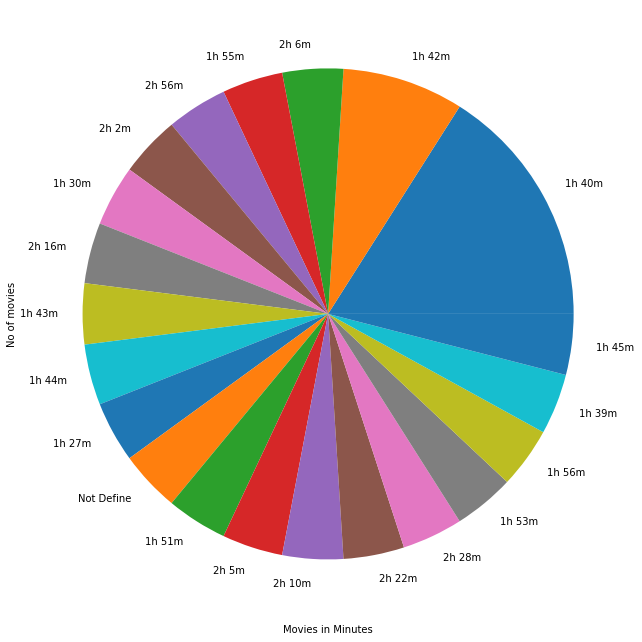

In [92]:
fig=plt.figure()
fig.set_figwidth(11)
fig.set_figheight(18)
First_data['Runtime'].value_counts().plot(kind='pie')
plt.xlabel('Movies in Minutes')
plt.ylabel('No of movies')
plt.show()

In [97]:
import seaborn as sns

<Figure size 864x504 with 0 Axes>

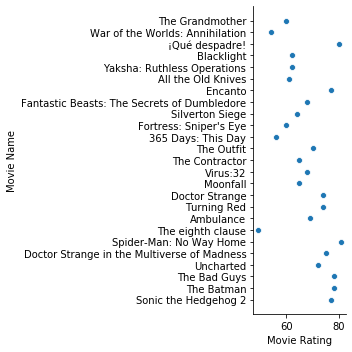

In [104]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)
sns.relplot(x='Movie Rating',y='Movie Name',data=First_data)
plt.show()